# **Data Science Project**  
### **Distinguishing Between Real and AI-Generated Images**  

#### **Team Members**:
- Noor Algumlas  
- Nouf Alaskar
- Nora Albyahi
- Lana Albogami   
- Layan Aldbays  






## **Data collection :**
## **sources:**

- Primary Data Source: CIFAKE Dataset https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data .

The primary data source is the CIFAKE dataset, which consists of:
1. Real Images: 60,000 images sourced from the CIFAR-10 dataset, covering ten categories such as airplanes, cats, and cars. These images are provided in JPG format with corresponding class labels.

2. AI-Generated Images: 60,000 synthetic images created using the Stable Diffusion v1-4 model, mimicking the same ten categories as the real images. These images are also in JPG format.

# **why we choose this source?:**

- **Diversity and Representativeness**:

The CIFAR-10 dataset is a well-established benchmark in computer vision, containing diverse images across ten categories (e.g., airplanes, cats, cars). This ensures our real images cover a broad range of object types, making the dataset representative for general AI-generated image detection.

- **Controlled Comparison** :

By ensuring that the AI-generated images mimic the same ten categories as the CIFAR-10 dataset, we maintain a controlled setting where differences between real and AI-generated images are primarily due to their nature (real vs. synthetic) rather than category imbalance.
This controlled comparison allows us to analyze the key visual discrepancies.

- **Standardized Formats** :

Both datasets are in JPG format, ensuring compatibility and consistency in preprocessing.

- **Availability and Reproducibility** :

CIFAR-10 is an open-source, widely used dataset, making our research easily reproducible by others.
Stable Diffusion is a publicly available AI model, meaning others can replicate or extend our work by generating similar AI-created images.


# **Methods used:**

1. **Evaluating Classification Model Accuracy
Approach:**

- Develop a classification model (such as VGG, CNN or Vision Transformer) to distinguish between real and AI-generated images.

- use the test set provided by CIFAKE.

- Evaluate the model’s performance using accuracy, precision, and recall.



2. **Identifying Key Elements in AI Classification
Approach:**

- Use Saliency Maps or Grad-CAM to visualize which parts of the image influence the model’s decision.

- Analyze the impact of image characteristics such as colors, edges, shadows, textures, and noise.

- Compare feature importance using different models.



3. **Effect of Preprocessing on AI’s Ability
Approach:**

- Apply various image preprocessing techniques such as:
Resizing, Rotation, Flipping, Gaussian Blurring, Histogram Equalization
- Compare model performance before and after preprocessing using the same evaluation metrics.



4. **Common AI Mistakes in Classification
Approach:**

- Analyze misclassified samples (False Positives and False Negatives).

- Identify recurring patterns in errors (such as does the model focus on incorrect details?).

- Compare different models (ResNet, EfficientNet, or Transformer-based models) to observe if the same mistakes persist.



5. **Comparing Human vs. AI Classification
Approach:**

- Conduct a survey where participants are asked to classify images as either real or AI-generated.
-	Record human classification accuracy and compare it with the AI model.
-	Perform a statistical analysis (such as T-test or Chi-square) to determine if there is a significant difference between human and AI performance.

# **Challenges Faced During Data Collection:**

1. **Nature of Unstructured Data:**

The data used in this project, including jpg images, is considered unstructured data. Unlike data organized in tables, images require additional steps to process them and extract useful information from them. Such as: color distribution, edges, and lighting patterns, which increases the complexity of the analysis process.

2. **Large Dataset Size:**

The data used in this project is unstructured data, JPG images. Unlike data organized in tables, images require additional steps to process them and extract useful information from them. Such as: color distribution, edges, and lighting patterns, which increases the complexity of the analysis process.

3. **Representation Bias:**

The images contain only specific groups such as (airplanes, cars, cats) which limits the model’s ability to identify images in the real world. This lack of diversity may make the model unable to generalize or provide accurate performance when dealing with new categories that are not present in the data.

4. **Variability in Image Quality:**

The quality of real images is clearly different from images manufactured by artificial intelligence.  
Real images usually have more detailed features and higher resolution than those generated by artificial intelligence. This difference in quality may cause the model to focus more on quality differences rather than the basic characteristics that distinguish actual images from fake ones.

5. **Limited Generation Tools:**

The Stable Diffusion model was used to create the image generated by artificial intelligence. This may cause the model to be biased towards identifying patterns for this tool due to its reliance on a single tool. Therefore, when the model is used on images produced by other AI tools, such as DALL-E or GANs, its performance can be affected.

# **Recommendations to Address Challenges:**

1. **Nature of Unstructured Data:**

Use image processing packages, such as OpenCV or PIL, to extract useful information from images.
Resize or compress images while retaining important information needed for analysis to ensure efficient processing.

2. **Large Dataset Size:**

Start with smaller, randomly selected parts of the data set for initial testing and model evaluation.   
Use cloud computing services like AWS or Google Colab to access more processing capacity, which can reduce processing time.

3. **Repre Train the model on more images from different and new categories.**

To make the dataset more diverse for real-world situations,   
To avoid biasing the model toward certain groups, make sure the data set is balanced, with an equal amount of images in each category.

4. **Variability in Image Quality:**

Use different processing methods such as lighting normalization and noise reduction to reduce the quality discrepancy between generated images and real images.  
To improve the generalization of the model across many datasets, train it using images of varying quality levels.

5. **Limited Generation Tools:**

To expand the diversity of the dataset, combine AI-generated images from additional tools, such as DALL-E and GANs.
To evaluate the model's resilience and generalizability, test it frequently using pictures from various sources.   


## **Decisions Made :**

Final Decisions for the Project Logbook
Throughout the project, several key decisions were made to ensure a structured and effective approach to achieving our research objectives. 

We decided to experiment with additional preprocessing techniques later on such as Rotation, Flipping, Gaussian Blurring, Histogram Equalization to evaluate their impact on classification accuracy. To understand what elements the AI focuses on, we plan to integrate Grad-CAM for feature visualization. For error analysis, we will investigate misclassified images to identify patterns in the model’s mistakes. Finally, to compare AI performance with human perception, we will conduct a survey where participants classify the same images, allowing us to measure human accuracy against the model. These decisions form the foundation of our experimental workflow and ensure that our research questions are systematically addressed.

## 2. **Exploratory Data Analysis (EDA):**

### **Image Dimensions Analysis:**

In [4]:
import os
print(os.listdir(train_dir))  # List top-level directories in 'train'


['FAKE', 'REAL']


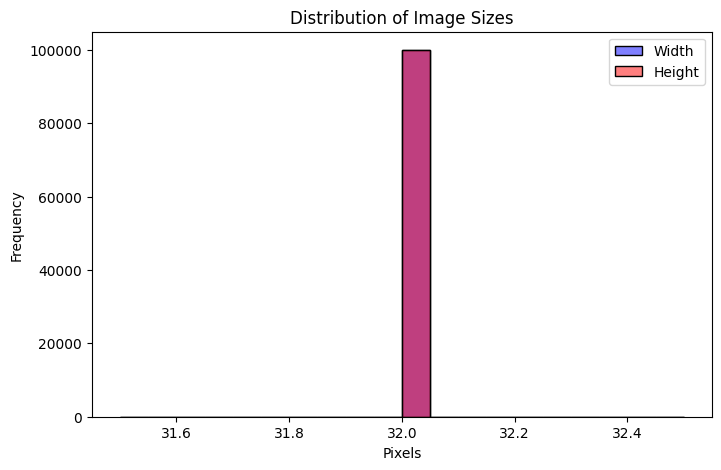

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for visualization
from PIL import Image

# Check Image Sizes
image_sizes = []
for i in range(len(train_dataset)):
    image_path = train_dataset.imgs[i][0]  # Direct path from ImageFolder
    try:
        img = Image.open(image_path)
        image_sizes.append(img.size)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        continue

widths, heights = zip(*image_sizes)

# Plot the distribution of image sizes
plt.figure(figsize=(8, 5))
sns.histplot(widths, bins=20, color='blue', label="Width", kde=True)
sns.histplot(heights, bins=20, color='red', label="Height", kde=True)
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Distribution of Image Sizes")
plt.legend()
plt.show()



This graph indicates that all images in the dataset have the same dimensions, as there is a single sharp bar with no significant variation in values. This suggests that both real (REAL) and AI-generated (FAKE) images were either created or stored with identical dimensions. From this analysis, we can conclude that image size is not a distinguishing factor between the two classes, meaning the classification model cannot rely on dimensions as a feature for differentiation. As a result, there is no need for Resizing during Preprocessing, since all images are already uniform in size. This understanding allows us to focus on other, more impactful analyses, such as contrast and edges, which may reveal distinctive patterns between real and AI-generated images.

### **Class Distribution Analysis:**

C:\Users\Noor\AppData\Local\Temp\ipykernel_16884\3319374147.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


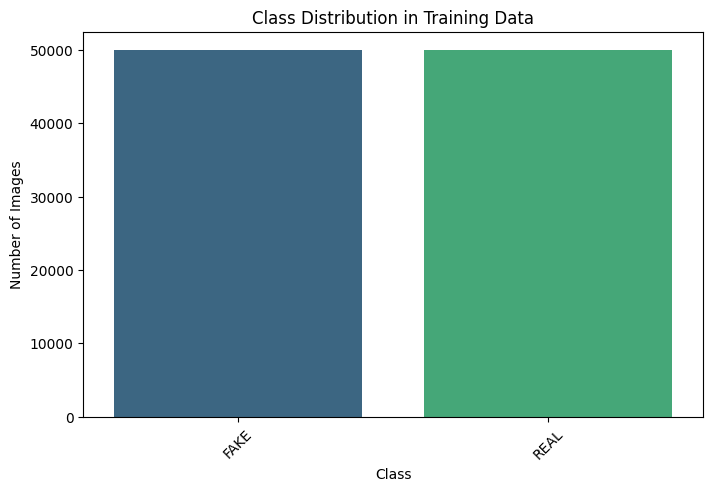

In [56]:
# Ensure seaborn is installed

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from PIL import Image
from torch.utils.data import DataLoader

# Define dataset path
train_dir = "train"

# Load dataset with transform (convert images to tensors)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# Get class names and distribution
class_names = train_dataset.classes
class_counts = {class_names[i]: 0 for i in range(len(class_names))}

for _, label in train_dataset:
    class_counts[class_names[label]] += 1

# Convert to lists for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot dataset distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=classes, y=counts, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()

The graph shows that the number of images in the REAL and FAKE categories is nearly equal, as both bars have almost the same height. This indicates that the training dataset is well-balanced, meaning the model will not develop a bias toward one class simply due to a difference in sample count. This balance enhances model accuracy, allowing it to distinguish between images based on actual features such as edges, contrast, and texture, rather than class quantity. Additionally, we do not need to address Data Imbalance, which simplifies the training process. This analysis deepens our understanding of the dataset by confirming that differences between real and AI-generated images are not driven by quantity but rather by visual characteristics that the model can learn. 

### **Sample Image Visualization:**

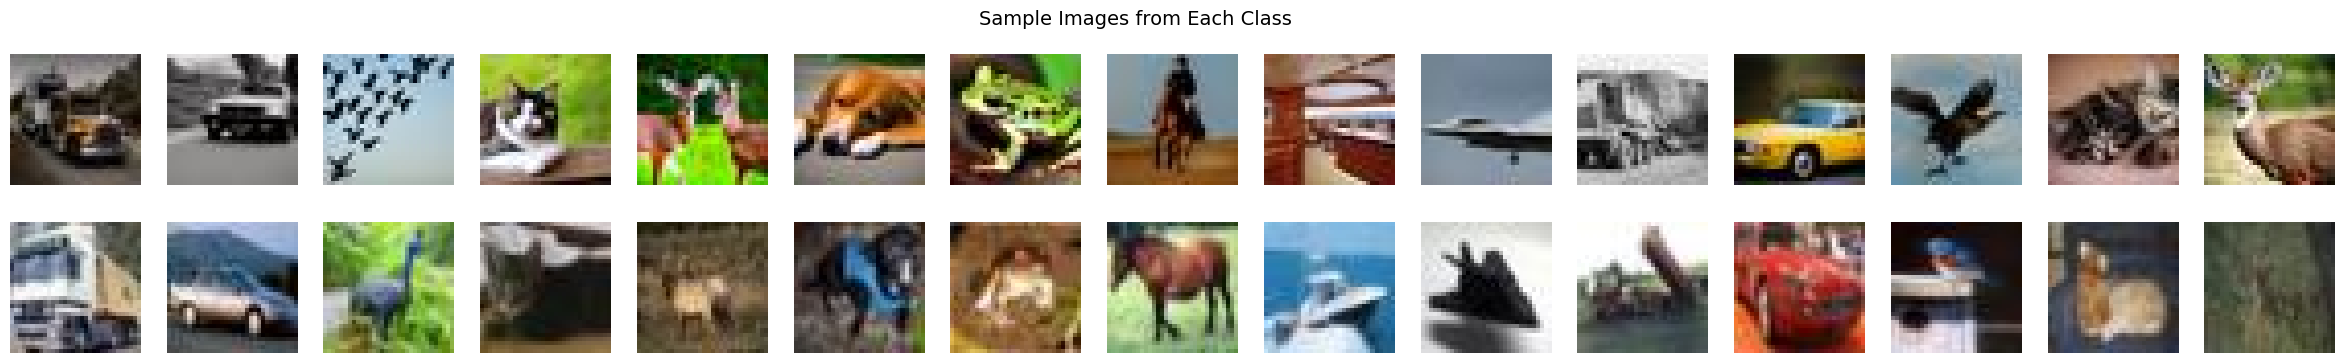

In [57]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from PIL import Image
from torch.utils.data import DataLoader

# Define dataset path
train_dir = "train"

# Load dataset with transform (convert images to tensors)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# Get class names and distribution
class_names = train_dataset.classes
class_counts = {class_names[i]: 0 for i in range(len(class_names))}

for _, label in train_dataset:
    class_counts[class_names[label]] += 1

# Convert to lists for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Show sample images per class
def show_sample_images(dataset, class_names, num_samples=30):
    images_per_class = num_samples // len(class_names)  # Distribute images equally
    fig, axes = plt.subplots(len(class_names), images_per_class, figsize=(images_per_class * 2, len(class_names) * 2))

    for i, class_name in enumerate(class_names):
        # Get the images for the specific class
        class_images = [img for img, label in dataset if dataset.classes[label] == class_name][:images_per_class]
        for j in range(images_per_class):
            img = class_images[j].permute(1, 2, 0).numpy()  # Convert tensor to numpy for visualization
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
        axes[i, 0].set_ylabel(class_name, fontsize=12)
    
    plt.suptitle("Sample Images from Each Class", fontsize=14)
    plt.show()

show_sample_images(train_dataset, class_names, num_samples=30)


The image displays a sample of 30 images from the training dataset, showcasing a variety of examples for each category (REAL and FAKE). From this sample, we can observe that the dataset includes diverse elements such as animals, vehicles, and landscapes, indicating that the images are not restricted to a specific type. This visual representation helps us better understand the nature of the dataset and provides insight into the variation between real and AI-generated images.

This analysis is important because it ensures that both classes are well-represented in the dataset, allowing the model to learn from a diverse range of examples. Additionally, if clear differences are noticed in how AI-generated images are created compared to real ones (e.g., lack of detail, slight blurriness, or artifacts in fake images), these could serve as key features for classification.

The conclusion is Viewing the dataset in this way allows us to visually inspect data quality, diversity, and potential distinguishing factors between real and fake images, which helps in guiding Preprocessing steps and improving model performance.

### **RGB Channel Distribution Analysis:**

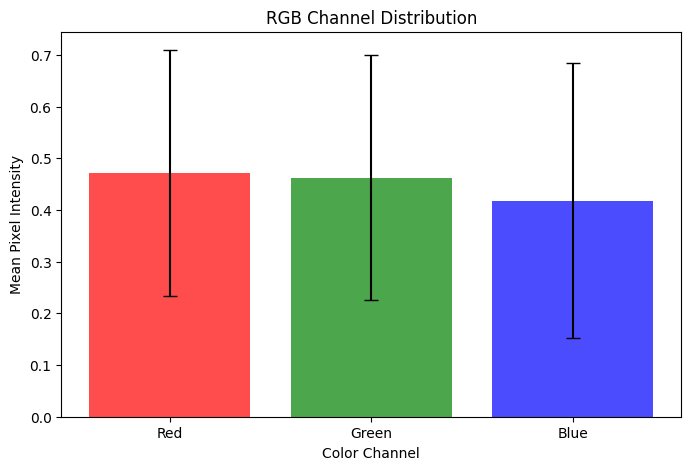

In [58]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from PIL import Image
from torch.utils.data import DataLoader

# Define dataset path
train_dir = "train"

# Load dataset with transform (convert images to tensors)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# Analyze Pixel Intensities per Channel
image_tensors = [img for img, _ in train_dataset]
image_tensors = torch.stack(image_tensors)  # Stack all images into a single tensor

# Compute mean and std for each channel (RGB)
mean_rgb = torch.mean(image_tensors, dim=[0, 2, 3]).numpy()
std_rgb = torch.std(image_tensors, dim=[0, 2, 3]).numpy()

# Plot RGB Distributions
plt.figure(figsize=(8, 5))
plt.bar(["Red", "Green", "Blue"], mean_rgb, yerr=std_rgb, color=["red", "green", "blue"], alpha=0.7, capsize=5)
plt.xlabel("Color Channel")
plt.ylabel("Mean Pixel Intensity")
plt.title("RGB Channel Distribution")
plt.show()

The graph shows the mean pixel intensity for each color channel (Red, Green, Blue) in the dataset, with error bars representing the standard deviation (std). These values indicate how colors are distributed across real and AI-generated images. We observe that the mean intensities for all three channels (R, G, B) are very close, suggesting that there is no strong color bias in the dataset and that color distribution is relatively balanced.

What can we conclude from this?

- There is no significant difference in color distribution between real and AI-generated images, meaning that color alone may not be a decisive factor for classification.
- The standard deviation (std) values are similar across all channels, indicating that all three color channels exhibit similar levels of variation, suggesting that the dataset is well-balanced in terms of color distribution.
- This analysis helps us determine whether preprocessing techniques such as color normalization or color augmentation are necessary to enhance model performance.

The cnclusion is based on the color distribution analysis, we see that colors are almost evenly distributed, meaning the model may need to rely on other distinguishing factors, such as edge details and contrast, to differentiate between real and AI-generated images.

### **Detecting Corrupt Images:**


Total Images: 100000
Valid Images: 100000
Corrupt Images: 0


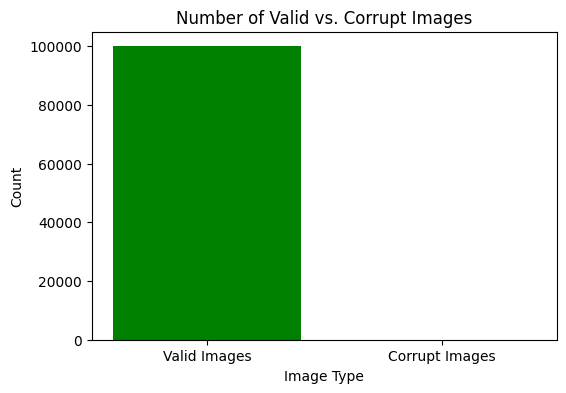

In [59]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define dataset path
train_dir = "train"

# Check for corrupt images
corrupt_images = []
total_images = 0

for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            total_images += 1
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify if the image is corrupt
            except (IOError, SyntaxError):
                corrupt_images.append(img_path)

# Count the results
num_corrupt = len(corrupt_images)
num_valid = total_images - num_corrupt

# Print results
print(f"\nTotal Images: {total_images}")
print(f"Valid Images: {num_valid}")
print(f"Corrupt Images: {num_corrupt}")

# Plot the results using a Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(["Valid Images", "Corrupt Images"], [num_valid, num_corrupt], color=["green", "red"])
plt.xlabel("Image Type")
plt.ylabel("Count")
plt.title("Number of Valid vs. Corrupt Images")
plt.show()


The chart shows that almost all images are valid, with the green bar dominating while corrupt images are nearly nonexistent. This indicates high data quality and readiness for training without additional cleaning. The absence of corrupt images confirms that the data collection process was well-executed, with no file corruption or formatting issues.

### **Image Color Analysis:**

Dataset Analysis for FAKE images:
- Total images: 50000
- Grayscale images: 1120
- Colored images: 48880

Dataset Analysis for REAL images:
- Total images: 50000
- Grayscale images: 616
- Colored images: 49384


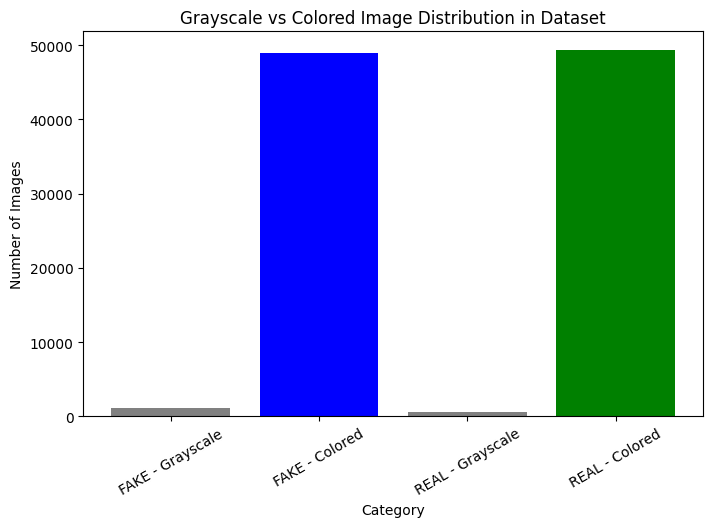

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def is_grayscale(image_path):
    """Check if an image is grayscale or colored"""
    img = Image.open(image_path).convert("RGB")  # Convert to RGB to ensure three channels
    img_array = np.array(img)
    
    # If all three channels (R, G, B) are equal, the image is grayscale
    return np.all(img_array[:, :, 0] == img_array[:, :, 1]) and np.all(img_array[:, :, 1] == img_array[:, :, 2])

def check_dataset_images(folder_path):
    """Scan all images in the folder and classify them as grayscale or colored"""
    grayscale_count = 0
    color_count = 0
    total_images = 0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            total_images += 1
            image_path = os.path.join(folder_path, filename)
            if is_grayscale(image_path):
                grayscale_count += 1
            else:
                color_count += 1

    return total_images, grayscale_count, color_count

# Define dataset paths
dataset_path_FAKE = "train/FAKE"
dataset_path_REAL = "train/REAL"

# Get image counts for each category
total_fake, grayscale_fake, color_fake = check_dataset_images(dataset_path_FAKE)
total_real, grayscale_real, color_real = check_dataset_images(dataset_path_REAL)

# Print results
print(f"Dataset Analysis for FAKE images:")
print(f"- Total images: {total_fake}")
print(f"- Grayscale images: {grayscale_fake}")
print(f"- Colored images: {color_fake}\n")

print(f"Dataset Analysis for REAL images:")
print(f"- Total images: {total_real}")
print(f"- Grayscale images: {grayscale_real}")
print(f"- Colored images: {color_real}")

# Plot results using Bar Chart
labels = ["FAKE - Grayscale", "FAKE - Colored", "REAL - Grayscale", "REAL - Colored"]
values = [grayscale_fake, color_fake, grayscale_real, color_real]
colors = ["gray", "blue", "gray", "green"]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Grayscale vs Colored Image Distribution in Dataset")
plt.xticks(rotation=30)
plt.show()


The chart shows that most images in both REAL and FAKE categories are colored, with very few grayscale images. This suggests that AI-generated images tend to mimic natural colors. The presence of some grayscale images may be due to differences in data sources or generation techniques. Color analysis could help distinguish real from fake images, but further investigation is needed to determine its effectiveness as a classification feature. 

### **Pixel Intensity Distribution Analysis:**

C:\Users\Noor\AppData\Local\Temp\ipykernel_16884\1478216455.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


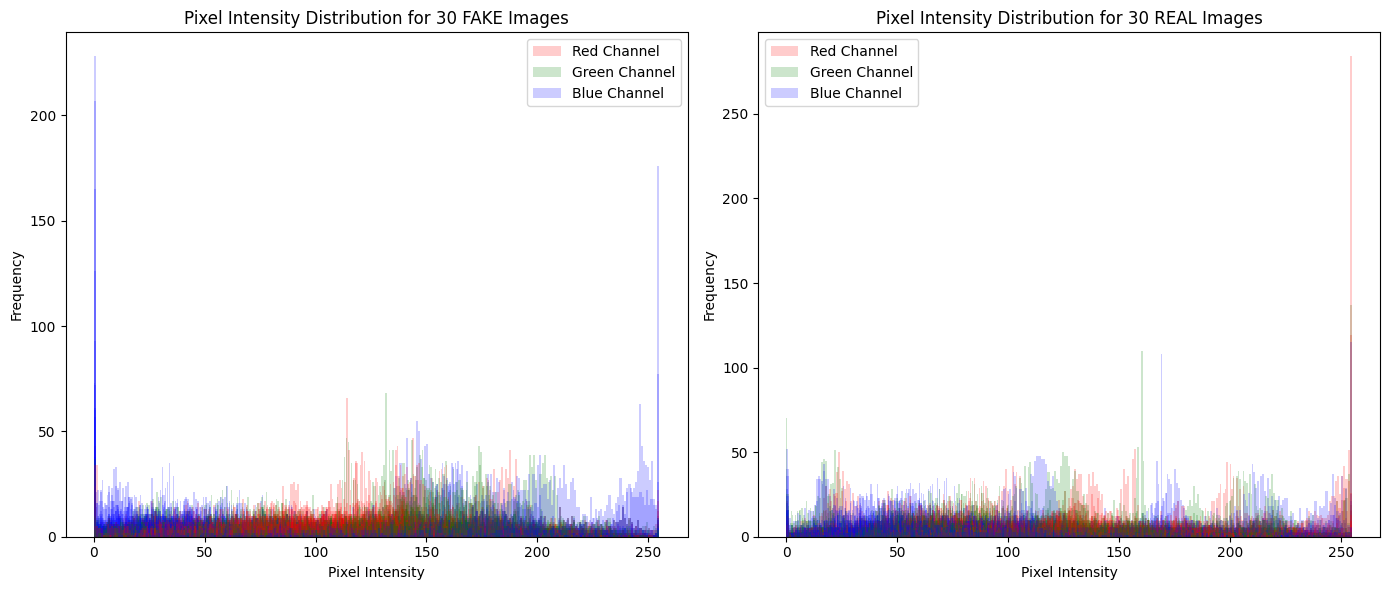

In [61]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_dataset_pixel_distribution_separate(folder_path, num_real=30, num_fake=30):
    """Plot pixel intensity histograms for FAKE and REAL images in separate graphs."""
    subfolders = ['FAKE', 'REAL']
    images = {'FAKE': [], 'REAL': []}

    # Collect images separately for each category
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        images[subfolder] = [
            os.path.join(subfolder, f) for f in os.listdir(subfolder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

    # Select the first `num_real` REAL and `num_fake` FAKE images
    selected_fake_images = images['FAKE'][:num_fake]
    selected_real_images = images['REAL'][:num_real]

    # Create subplots for separate analysis
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot FAKE images
    for img_path in selected_fake_images:
        img = Image.open(os.path.join(folder_path, img_path)).convert("RGB")
        img_array = np.array(img)

        r_vals = img_array[:, :, 0].flatten()
        g_vals = img_array[:, :, 1].flatten()
        b_vals = img_array[:, :, 2].flatten()

        axes[0].hist(r_vals, bins=256, color='red', alpha=0.2, label="Red Channel" if img_path == selected_fake_images[0] else "")
        axes[0].hist(g_vals, bins=256, color='green', alpha=0.2, label="Green Channel" if img_path == selected_fake_images[0] else "")
        axes[0].hist(b_vals, bins=256, color='blue', alpha=0.2, label="Blue Channel" if img_path == selected_fake_images[0] else "")

    axes[0].set_xlabel("Pixel Intensity")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Pixel Intensity Distribution for {num_fake} FAKE Images")
    axes[0].legend()

    # Plot REAL images
    for img_path in selected_real_images:
        img = Image.open(os.path.join(folder_path, img_path)).convert("RGB")
        img_array = np.array(img)

        r_vals = img_array[:, :, 0].flatten()
        g_vals = img_array[:, :, 1].flatten()
        b_vals = img_array[:, :, 2].flatten()

        axes[1].hist(r_vals, bins=256, color='red', alpha=0.2, label="Red Channel" if img_path == selected_real_images[0] else "")
        axes[1].hist(g_vals, bins=256, color='green', alpha=0.2, label="Green Channel" if img_path == selected_real_images[0] else "")
        axes[1].hist(b_vals, bins=256, color='blue', alpha=0.2, label="Blue Channel" if img_path == selected_real_images[0] else "")

    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title(f"Pixel Intensity Distribution for {num_real} REAL Images")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Example usage with your dataset path
dataset_path = "train"  # Replace with your actual dataset path
plot_dataset_pixel_distribution_separate(dataset_path, num_real=30, num_fake=30)




The graph illustrates the pixel intensity distribution across the three color channels (Red, Green, and Blue) for each image category, with separate histograms for REAL and FAKE images. Due to the large dataset size, a total of 30 images per category were selected to gain a broader perspective on color distribution characteristics.

Key Observations:

- Both distributions exhibit a wide range of color intensities, indicating diverse colors within each category.
- There are peaks in high and low intensity values, suggesting the presence of bright and dark regions in the images.
- Potential differences between real and fake image distributions may provide useful features for distinguishing between AI-generated and real images.

What Can We Conclude from This Analysis?

- Understanding color distribution differences can help the model detect AI-generated images based on color characteristics.
- If significant variations exist between REAL and FAKE distributions, color-based features may be useful for classification.


### **Image Contrast Analysis:**

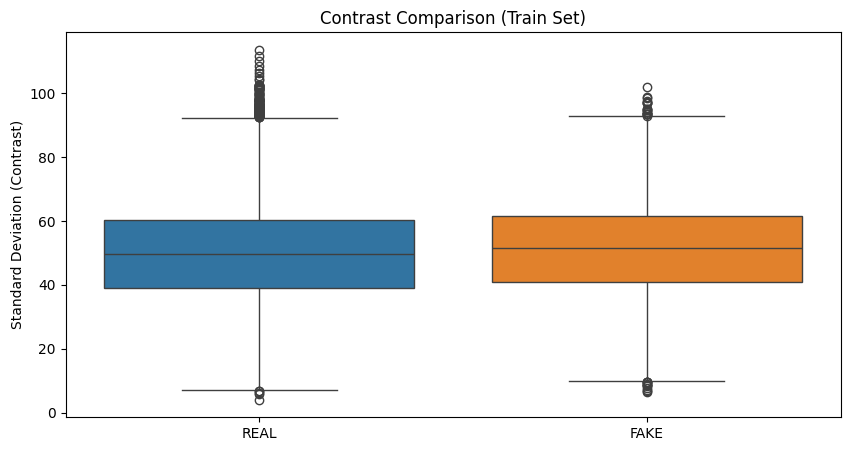

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

# Specify the data path
data_dirs = {"Train": "train"}
categories = ["REAL", "FAKE"]

# Store contrast values ​​for each image.
contrast_values = {"Train": {"REAL": [], "FAKE": []}}

# Calculate contrast for each image
for dataset, path in data_dirs.items():
    for category in categories:
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            try:
                # Open the image and convert it to grayscale.
                img = Image.open(img_path).convert("L")  # "L" stands for Grayscale.

                # Convert image to NumPy matrix to calculate contrast
                img_array = np.array(img)
                contrast = img_array.std()  # Standard deviation represents variance.
                
                # Store the contrast value
                contrast_values[dataset][category].append(contrast)

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

# Comparison between the variance of REAL and FAKE
plt.figure(figsize=(10, 5))
sns.boxplot(data=[contrast_values["Train"]["REAL"], contrast_values["Train"]["FAKE"]])
plt.xticks([0, 1], ["REAL", "FAKE"])
plt.title("Contrast Comparison (Train Set)")
plt.ylabel("Standard Deviation (Contrast)")
plt.show()


The boxplot illustrates the distribution of contrast values for REAL and FAKE images. The standard deviation (contrast metric) is used as a measure of variation in pixel intensity, where higher values indicate images with more distinct details and colors, while lower values suggest smoother or less detailed images.

Key Observations:

- The contrast distribution appears relatively similar between REAL and FAKE images, suggesting that both categories contain a mix of high-contrast and low-contrast images.
- There are noticeable outliers in both categories, represented by the points outside the upper and lower whiskers of the boxplot.
- These outliers indicate images with unusually low or high contrast, possibly due to very dark images, extremely bright images, or uniform backgrounds with minimal detail.

What Do These Contrast Outliers Mean?

- If the outliers are natural, they may represent low-contrast scenes such as fog, sky, or plain surfaces, which are not necessarily problematic.
- If the images appear corrupted or distorted (e.g., completely dark or overexposed images), they might negatively impact model performance and should be considered for removal.

#### **Z-score Distribution Analysis for Image Contras:**

We decided to use Z-score after noticing outliers in our Image Contrast Analysis. Since some images fell outside the normal range, it was unclear whether these values reflected natural variations in the data or resulted from errors or distortions. By using Z-score, we can measure how far each image deviates from the mean, helping us identify images with unusual contrast in a statistically reliable way. This method allows us to distinguish natural images from outliers based on the overall data distribution rather than absolute values alone.

Number of outliers in REAL category: 2059
Number of outliers in FAKE category: 1928


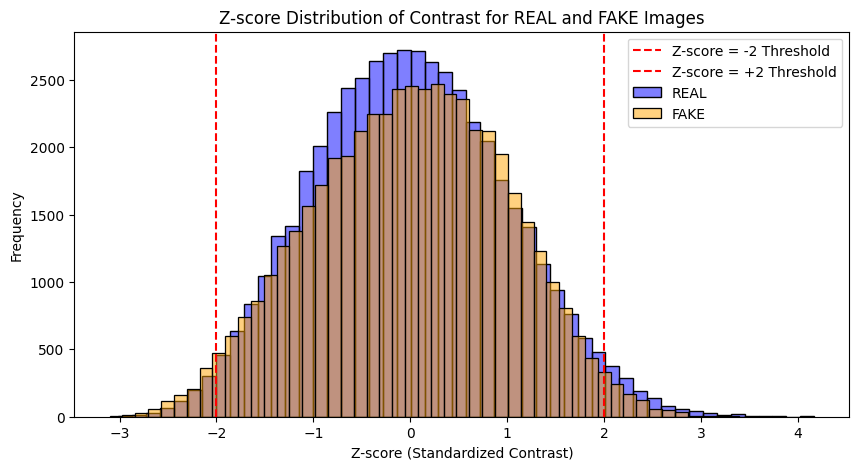

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert contrast values to numpy arrays
real_contrast = np.array(contrast_values["Train"]["REAL"])
fake_contrast = np.array(contrast_values["Train"]["FAKE"])

# Compute mean and standard deviation for each category
real_mean, real_std = np.mean(real_contrast), np.std(real_contrast)
fake_mean, fake_std = np.mean(fake_contrast), np.std(fake_contrast)

# Compute Z-score for each image
real_z_scores = (real_contrast - real_mean) / real_std
fake_z_scores = (fake_contrast - fake_mean) / fake_std

# Identify outliers (Z-score less than -2 or greater than +2)
real_outliers = real_contrast[(real_z_scores < -2) | (real_z_scores > 2)]
fake_outliers = fake_contrast[(fake_z_scores < -2) | (fake_z_scores > 2)]

# Print number of outliers
print(f"Number of outliers in REAL category: {len(real_outliers)}")
print(f"Number of outliers in FAKE category: {len(fake_outliers)}")

# Plot Z-score distribution
plt.figure(figsize=(10, 5))
sns.histplot(real_z_scores, bins=50, color='blue', alpha=0.5, label="REAL")
sns.histplot(fake_z_scores, bins=50, color='orange', alpha=0.5, label="FAKE")

# Add threshold lines at -2 and +2
plt.axvline(-2, color='red', linestyle='dashed', label="Z-score = -2 Threshold")
plt.axvline(2, color='red', linestyle='dashed', label="Z-score = +2 Threshold")

# Labels and legend
plt.xlabel("Z-score (Standardized Contrast)")
plt.ylabel("Frequency")
plt.title("Z-score Distribution of Contrast for REAL and FAKE Images")
plt.legend()
plt.show()

The histogram illustrates the Z-score distribution of image contrast for both REAL and FAKE images after standardizing the values based on the mean and standard deviation of each category. The red dashed lines mark the thresholds at -2 and +2, which are used to identify outliers.

Observations:

The distribution shows that most images fall within the Z-score range of -2 to +2, indicating that their contrast is close to the average for their respective category. However, some images lie outside this range, meaning they have either very high or very low contrast compared to the rest of the dataset. Additionally, the overall distribution of contrast appears similar between REAL and FAKE images, though minor variations may exist between the two categories.

What Can We Learn from This?

This analysis allows us to identify images with unusual contrast levels and visually inspect them to determine whether these outliers are naturally occurring or caused by data issues. If some of these outlier images appear distorted or unclear, removing them from the training set could enhance model accuracy. However, if these images represent natural diversity in the dataset, keeping them may be beneficial to ensure the model learns to handle various contrast levels effectively.

#### **Visual Inspection of Outliers for Decision Making:** 

After identifying outliers using Z-score, we conducted a visual inspection of these images to determine whether these outliers were naturally occurring or a result of data issues. This step involved displaying a sample of outlier images from both REAL and FAKE categories to observe any distortions or quality issues.



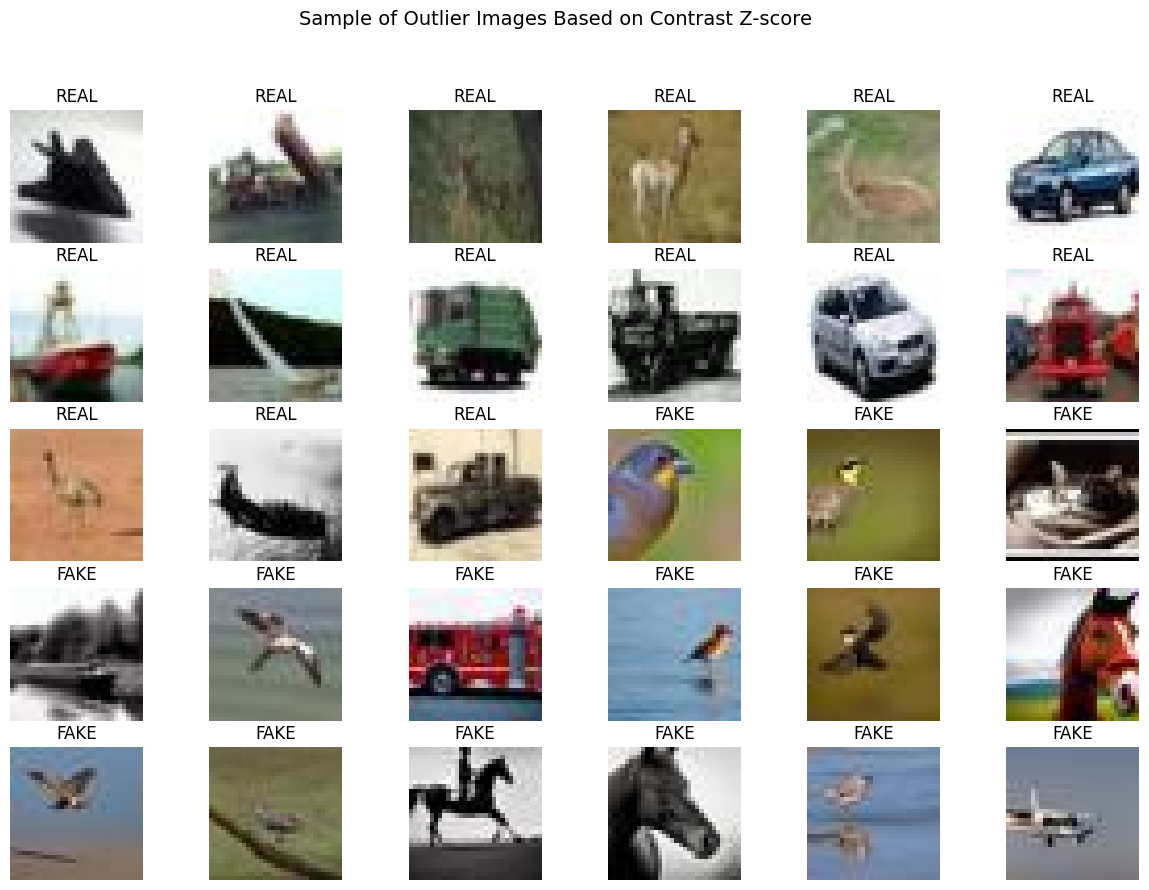

In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Select images with extreme Z-scores (outliers)
num_samples = 30  # Number of images to display

# Get indices of images with Z-score < -2 or > +2
real_outlier_indices = np.where((real_z_scores < -2) | (real_z_scores > 2))[0]
fake_outlier_indices = np.where((fake_z_scores < -2) | (fake_z_scores > 2))[0]

# Select a subset of images (15 from REAL, 15 from FAKE)
selected_real_indices = real_outlier_indices[:num_samples // 2]
selected_fake_indices = fake_outlier_indices[:num_samples // 2]

# Combine selected indices
selected_indices = list(selected_real_indices) + list(selected_fake_indices)
selected_categories = (["REAL"] * len(selected_real_indices)) + (["FAKE"] * len(selected_fake_indices))

# Display images in a grid
plt.figure(figsize=(15, 10))
columns = 6  # Number of columns in the grid
rows = num_samples // columns + (num_samples % columns > 0)  # Determine the number of rows

for i, (idx, category) in enumerate(zip(selected_indices, selected_categories)):
    # Get image path
    img_folder = f"train/{category}"
    img_filename = os.listdir(img_folder)[idx]  # Select image based on index
    img_path = os.path.join(img_folder, img_filename)

    # Open image
    img = Image.open(img_path)

    # Plot image
    plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)

plt.suptitle("Sample of Outlier Images Based on Contrast Z-score", fontsize=14)
plt.show()

Why Did We Conduct a Visual Evaluation?

Statistical analysis alone may not be sufficient, as some outliers could be natural variations in the dataset rather than actual issues. Therefore, visually inspecting these images was crucial to assess whether they represent normal patterns or exhibit problems like blurriness, distortions, or artificial enhancements.

Observations:
- Most outlier images appeared natural, featuring scenes with low-detail areas such as the sky or ocean, or naturally high-contrast elements.
- No significant distortions or incomprehensible images were detected, suggesting that these outliers reflect natural diversity rather than data errors.

Decision Made:

Based on this visual inspection, we decided to retain these images in the dataset, as we did not find any obvious issues that could impact model accuracy. However, we will monitor the model’s performance, and if these images negatively affect results, we will reconsider removing them.

### **Image Edge Eensity Analysis:**

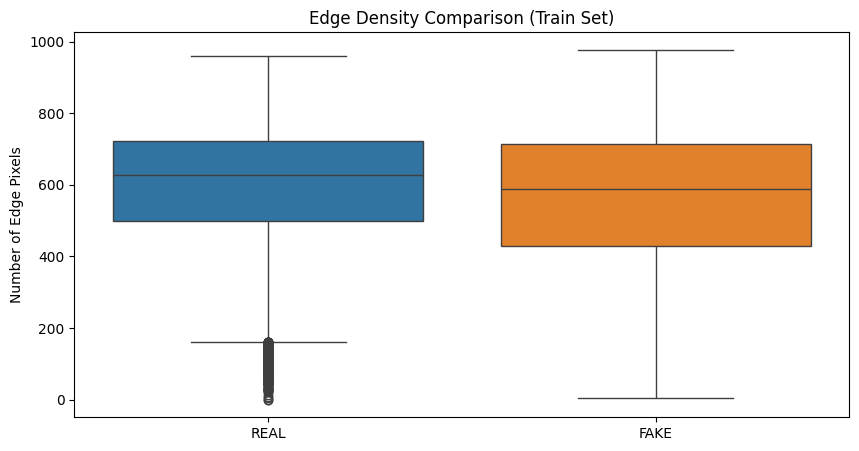

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFilter

# Define data paths
data_dirs = {"Train": "train"}
categories = ["REAL", "FAKE"]

# Function to extract the number of edges using Sobel Edge Detection
def count_edges(image_path):
    try:
        # Open the image and convert it to Grayscale.
        img = Image.open(image_path).convert("L")  # "L" stands for grayscale.
        
        # Convert image to NumPy array
        img_array = np.array(img)

        # Sobel Filter Edge Extraction App
        sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Horizontal edge filter
        sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Vertical edge filter
        
        # Differential Calculus Using Sobel
        edges_x = np.abs(np.convolve(img_array.flatten(), sobel_x.flatten(), mode='valid'))
        edges_y = np.abs(np.convolve(img_array.flatten(), sobel_y.flatten(), mode='valid'))
        
        # Count the number of pixels that contain edges
        edge_pixels = np.sum((edges_x + edges_y) > 100)  # Threshold 100 for edge detection
        
        return edge_pixels
    
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return 0

# Store the number of edges per image.
edge_counts = {"Train": {"REAL": [], "FAKE": []}}

# Apply edge analysis to all images
for dataset, path in data_dirs.items():
    for category in categories:
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            edge_counts[dataset][category].append(count_edges(img_path))

# Comparison plot of the number of edges between real and fake images.
plt.figure(figsize=(10, 5))
sns.boxplot(data=[edge_counts["Train"]["REAL"], edge_counts["Train"]["FAKE"]])
plt.xticks([0, 1], ["REAL", "FAKE"])
plt.title("Edge Density Comparison (Train Set)")
plt.ylabel("Number of Edge Pixels")
plt.show()


The boxplot illustrates the distribution of edge density (Edge Pixels) in real (REAL) and AI-generated (FAKE) images. Upon examining the outliers, we notice that they appear only in real images (REAL) on the lower end of the distribution, meaning that some real images have low edge density that may represent scenes with poor lighting, extremely smooth surfaces, or low-quality images. Meanwhile, in fake images (FAKE), there are no prominent outliers, suggesting that edge density in these images is more consistently distributed without extreme cases.



#### **Outlier Detection in Edge Density Using Z-score:**
We decided to perform Outlier Detection in Edge Density Using Z-score to identify images in the dataset that have significantly lower edge density compared to others. Since edges are crucial for distinguishing real and AI-generated images, detecting outliers helps us determine whether these images are naturally low in detail (such as skies or smooth surfaces) or if they result from data issues. This analysis allows us to decide whether to keep or remove these images based on their impact on model performance. 

Number of outliers in REAL category: 2227


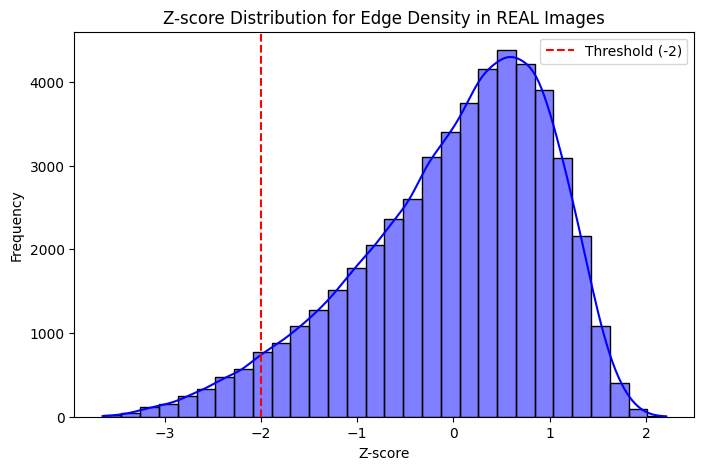

In [66]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean and standard deviation
real_edges = np.array(edge_counts["Train"]["REAL"])
mean_edge_density = np.mean(real_edges)
std_edge_density = np.std(real_edges)

# Compute Z-score for each image
z_scores = (real_edges - mean_edge_density) / std_edge_density

# Identify outliers (Z-score less than -2)
outliers = real_edges[z_scores < -2]
num_outliers = len(outliers)

# Print the number of outliers
print(f"Number of outliers in REAL category: {num_outliers}")

# Plot Z-score density distribution
plt.figure(figsize=(8, 5))
sns.histplot(z_scores, bins=30, kde=True, color='blue')
plt.axvline(-2, color='red', linestyle='dashed', label="Threshold (-2)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.title("Z-score Distribution for Edge Density in REAL Images")
plt.legend()
plt.show()


The histogram illustrates the distribution of Z-scores for edge density in REAL images. The red dashed line marks the Z-score threshold (-2), which is used to identify images with significantly lower edge density compared to the dataset's average. Any image falling beyond this threshold is considered an outlier.

- Key Observations:

The majority of images have Z-scores close to the mean (0), forming a right-skewed distribution.
Outliers are located in the far-left tail of the distribution, indicating images with significantly lower edge density.
A total of 2227 images have been classified as outliers based on this threshold.

- What Do These Outliers Indicate?

1- Low edge density may be due to natural factors, such as smooth surfaces, uniform backgrounds, or low-texture scenes. keeping them ensures model robustness to diverse inputs.

2- Alternatively, it could indicate potential dataset issues, such as poor-quality images or artifacts affecting classification performance. Removing them may improve model accuracy by eliminating misleading training data.


#### **Visual Inspection of Outliers for Decision Making:**

After analyzing the Z-score for edge density, we decided to visually inspect the outliers to determine whether they were caused by natural factors or data issues. We displayed 30 images from the REAL category with the lowest edge density to assess their quality.

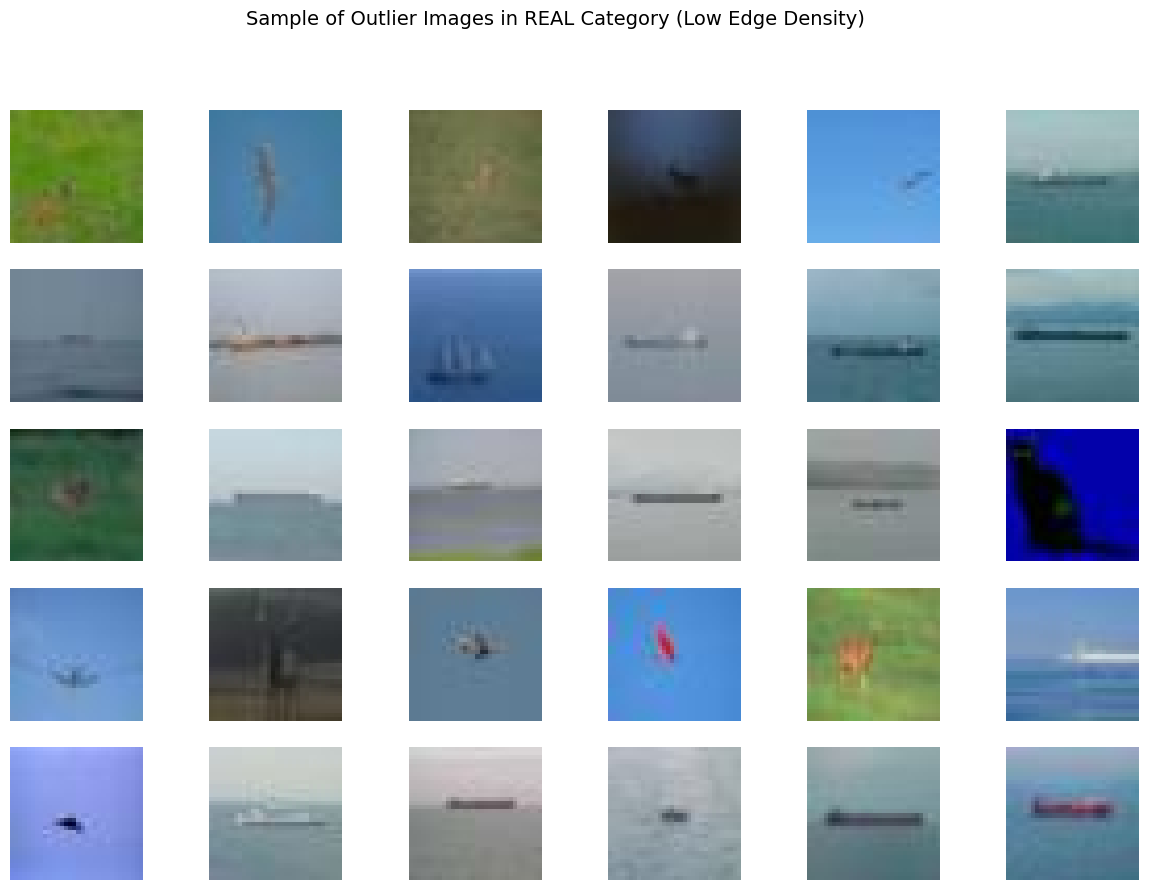

In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Select images with the lowest edge density
num_samples = 30  # Number of images to display
lowest_edge_indices = np.argsort(edge_counts["Train"]["REAL"])[:num_samples]  # Get the 30 lowest edge density images

# Set up the grid for displaying images
plt.figure(figsize=(15, 10))
columns = 6  # Number of columns in the grid
rows = num_samples // columns + (num_samples % columns > 0)  # Determine the number of rows

for i, idx in enumerate(lowest_edge_indices):
    img_path = os.path.join("train/REAL", os.listdir("train/REAL")[idx])
    img = Image.open(img_path)

    plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.suptitle("Sample of Outlier Images in REAL Category (Low Edge Density)", fontsize=14)
plt.show()


Key Observations:

The displayed images appear mostly natural, containing low-detail scenes such as skies, oceans, and open grassy areas. We did not notice any significant distortions or corrupted images, suggesting that the low edge density in these images is due to natural scene characteristics rather than data errors.

Decision Made:

We have decided to retain these images for now and test the model's performance with them, as they represent natural variations in the dataset, helping the model recognize low-detail scenes more accurately. However, if we later observe that these outliers negatively impact model accuracy, we will reconsider this decision and remove them if necessary.

### **Relationship Between Contrast and Edge Density in Images:**

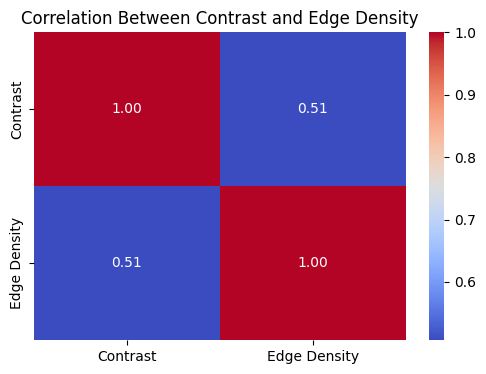

In [68]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset path
data_dirs = {"Train": "train"}
categories = ["REAL", "FAKE"]

# Functions to compute contrast and edge density
def calculate_contrast(image_path):
    """Calculate image contrast using standard deviation of pixel intensities."""
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img)
    return img_array.std()  # Standard deviation represents contrast

def count_edges(image_path):
    """Estimate edge density using Sobel filter approximation."""
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img)
    
    # Approximate Sobel edge detection (basic filter without OpenCV)
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Horizontal edges
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Vertical edges
    
    edges_x = np.abs(np.convolve(img_array.flatten(), sobel_x.flatten(), mode='valid'))
    edges_y = np.abs(np.convolve(img_array.flatten(), sobel_y.flatten(), mode='valid'))
    
    return np.sum((edges_x + edges_y) > 100)  # Count edge pixels

# Store contrast and edge density
data = {"Category": [], "Contrast": [], "Edge Density": []}

# Process images
for dataset, path in data_dirs.items():
    for category in categories:
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            
            try:
                contrast = calculate_contrast(img_path)
                edge_density = count_edges(img_path)

                data["Category"].append(category)
                data["Contrast"].append(contrast)
                data["Edge Density"].append(edge_density)

            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute correlation
correlation_matrix = df[["Contrast", "Edge Density"]].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Contrast and Edge Density")
plt.show()


The analysis shows a moderate correlation (0.51) between contrast and edge density, meaning that higher contrast images often have more edges, but not always. This suggests that both features contribute partially independent information, so combining them may improve the model’s ability to classify real and AI-generated images. If the correlation were stronger (> 0.8), one feature might be enough, while a weaker correlation (< 0.3) would indicate complete independence. The moderate value we obtained means that the two features complement each other, making their combination more beneficial for the model rather than relying on just one.


### **Duplicate Image Analysis:**

FAKE Images - Unique: 49080, Duplicates: 920
REAL Images - Unique: 50000, Duplicates: 0


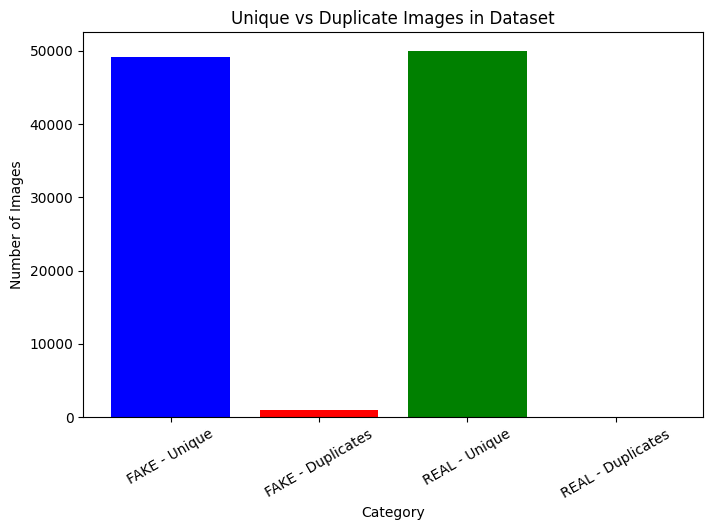

In [69]:
import os
import hashlib
import matplotlib.pyplot as plt

# Define dataset paths
dataset_paths = {"FAKE": "train/FAKE", "REAL": "train/REAL"}

# Function to compute image hash
def get_image_hash(image_path):
    """Compute the hash of an image file to detect duplicates."""
    hasher = hashlib.md5()  # MD5 hash function
    with open(image_path, "rb") as img_file:
        buf = img_file.read()
        hasher.update(buf)
    return hasher.hexdigest()

# Dictionary to store hash values
hashes = {"FAKE": {}, "REAL": {}}
duplicates = {"FAKE": 0, "REAL": 0}
unique_counts = {"FAKE": 0, "REAL": 0}

# Process each dataset
for category, path in dataset_paths.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img_hash = get_image_hash(img_path)
        
        if img_hash in hashes[category]:
            duplicates[category] += 1  # Increment duplicate count
        else:
            hashes[category][img_hash] = img_name
            unique_counts[category] += 1  # Increment unique count

# Print results
print(f"FAKE Images - Unique: {unique_counts['FAKE']}, Duplicates: {duplicates['FAKE']}")
print(f"REAL Images - Unique: {unique_counts['REAL']}, Duplicates: {duplicates['REAL']}")

# Plot the results using Bar Chart
labels = ["FAKE - Unique", "FAKE - Duplicates", "REAL - Unique", "REAL - Duplicates"]
values = [unique_counts["FAKE"], duplicates["FAKE"], unique_counts["REAL"], duplicates["REAL"]]
colors = ["blue", "red", "green", "orange"]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Unique vs Duplicate Images in Dataset")
plt.xticks(rotation=30)
plt.show()


The bar chart shows that most images in the dataset are unique, with very few duplicates, especially in the fake category (FAKE), where the red bar is minimal. This indicates that duplicates are not a major issue and have a negligible impact on data diversity. Given the small number of duplicates compared to the overall dataset size, we have decided not to remove them as their presence is unlikely to introduce significant bias or affect model performance. Instead, we will retain all images to preserve the dataset’s original distribution, ensuring a more representative training set.

## **Data Processing and Cleaning:**

#### **Data Cleaning:**

- Inspecting Raw Data:

Initially, we conducted Exploratory Data Analysis (EDA) to understand the characteristics of images in the REAL and FAKE categories. We analyzed image dimensions, contrast, edge density, and color distribution, which allowed us to detect any unusual patterns in the dataset. We found that the images exhibited natural diversity in their properties, but we also observed the presence of outliers in certain features such as contrast and edge density. We also found very few duplicates in the fake category images.

- Identifying Issues:

Through Z-score analysis, we identified images with significantly high or low contrast and edge density. To determine whether these values were caused by data issues or natural variations, we conducted a visual inspection of the outliers. Our findings revealed that these images were not corrupted or distorted but instead represented naturally low-detail scenes such as sky, water, and open grassy areas. Additionally, we identified a small number of duplicate images, but given their insignificant proportion relative to the dataset size, we concluded that they would not introduce bias or significantly impact model performance.  

Final Decision: 

We decided to retain both the outlier images and the duplicate images. The outliers contribute to the diversity of the dataset, helping the model learn to classify low-detail images accurately. As for the duplicate images, their low occurrence makes their effect negligible, so removing them is unnecessary. However, we will reassess both decisions during model training. If the outliers or duplicates negatively impact performance, we may consider removing or modifying them as needed.

- Handling Missing Values:

Since our dataset consists of images, there were no missing values in the traditional sense. However, we checked for corrupt images and successfully identified and removed them to prevent errors during training.

#### **Data Processing:**

For data preprocessing, we decided to use a pre-trained model that relies on libraries, which provides built-in image processing functionalities. However, we might need to apply manual transformations if required for additional experiments to answer our research questions. **Examples include:**

- Testing the impact of different preprocessing techniques (e.g., modifying brightness or colors) to evaluate their influence on model performance.
- Comparing model accuracy on original vs. transformed data to determine whether brightness or color significantly affects classification results.


Final Decision: 

We will primarily rely on the model’s built-in preprocessing capabilities but will conduct additional experiments to assess how certain image characteristics (such as contrast and edges) affect classification accuracy. Based on these results, we will make further adjustments if necessary.

## **Challenges Faced and How They Were Overcome:**

During the Exploratory Data Analysis (EDA) and Data Processing phases, we encountered several challenges that required careful consideration and appropriate solutions. Below are the key challenges we faced and the strategies we used to address them:

1. **Identifying and Handling Outliers**

Challenge: Some images had significantly low or high values in features like edge density and contrast, indicating potential outliers. However, it was unclear whether these were naturally occurring variations or issues in the data.

Solution: We used the Z-score method to standardize contrast and edge density values and identify images that deviated significantly from the mean. After visually inspecting these images, we decided to retain them since they represented natural variations rather than errors.

2. **Dealing with Color Distribution Variability**

Challenge: The color distribution of real and AI-generated images varied widely, but no significant differences were observed between the two categories. This made it unclear whether color features could effectively contribute to classification.

Solution: We plotted pixel intensity histograms for RGB channels separately for real and fake images. The analysis revealed that while both categories exhibit diverse color distributions, there were no strong distinguishing patterns. Given this, color features may not be a primary classification factor. However, if further analysis shows subtle differences, we may consider color normalization or contrast adjustments to refine the dataset.

3. **Dataset Size and Computational Limitations**

Challenge: The dataset contained a large number of images, making some computations slow and resource-intensive.

Solution: Instead of analyzing the entire dataset at once, we sampled subsets (e.g., 30 images for visualizations) to speed up analysis while maintaining accuracy. Additionally, we performed histogram-based analysis separately for REAL and FAKE images to identify patterns more efficiently.

4. **Deciding Whether to Remove Outliers**

Challenge: After detecting outliers, a major decision was whether to remove them or retain them for model training.

Solution: We visually inspected the outliers and found that most represented low-contrast natural scenes (e.g., sky, water, grass) rather than data errors. As a result, we decided to keep these images in the dataset and only consider removing them if they negatively impact model accuracy later.

**Conclusion:** By addressing these challenges methodically, we ensured a more robust dataset for training our classification model. The insights gained from EDA and data processing will help optimize the model’s learning process and improve its ability to distinguish between real and AI-generated images.

## 3. (research question) How Do Image Preprocessing Steps Affect a Model's Performance?

### Installing the Transformers Library
The `transformers` library by Hugging Face provides pre-trained models for tasks like image classification, text classification, translation, and more.  
We install it using the following command:


In [ ]:
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/20/37/1f29af63e9c30156a3ed6ebc2754077016577c094f31de7b2631e5d379eb/transformers-4.49.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.0 kB ? eta -:--:--
     ----------------- -------------------- 20.5/44.0 kB 320.0 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/44.0 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 44.0/44.0 kB 270.3 kB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.26.0 from https://files.pythonhosted.org/packages/13/5f/088ff08dc41808fcd99d9972b9bcfa7e3a35e30e8b0a3155b57938f1611c/huggingface_hub-0.29.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/38/ec/ad2d7de49a600cdb8dd78434a1aeffe28b9d6fc42eb36afab4a27ad23384/regex-2


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load the Model from Hugging Face

### Loading a Pretrained Vision Transformer (ViT) Model
We use the Hugging Face `transformers` library to load a pretrained ViT model for image classification.  
- **ViTForImageClassification**: Loads the Vision Transformer model for classification tasks.  
- **ViTFeatureExtractor**: Prepares input images for the model.  
- **Pretrained Model Used**: `"dima806/ai_vs_real_image_detection"`, trained to distinguish AI-generated images from real ones.


In [24]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load the trained model and feature extractor
model_name = "dima806/ai_vs_real_image_detection"

model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

print("Model loaded successfully!")


config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

c:\Users\Noor\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Noor\.cache\huggingface\hub\models--dima806--ai_vs_real_image_detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Model loaded successfully!


c:\Users\Noor\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Use the Model for Prediction on an Image

### Making a Prediction For Testing Using the Pretrained ViT Model
1. Load and preprocess an image using `PIL` and `ViTFeatureExtractor`.
2. Convert the image into a format compatible with the Vision Transformer.
3. Pass the image through the model in inference mode (`torch.no_grad()`).
4. Get the model’s classification and interpret the result.


In [30]:
import torch
from PIL import Image

# Load and preprocess an image

image_path = "test/FAKE/0 (2).jpg" # Change this to your test image path
image = Image.open(image_path).convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1).item()

# Interpret the result
label = "REAL" if prediction == 1 else "FAKE"
print(f"Prediction: {label}")


Prediction: REAL


## Use the Model for Prediction on 10 Images

### Testing Batch Processing Multiple Images Using the Pretrained ViT Model
1. Read images from the specified `test` dataset folder.
2. Preprocesses each image using the ViT feature extractor.
3. Passes the images through the model to make predictions.
4. Prints the classification result (REAL or FAKE).


In [ ]:
import os

test_folder = "C:/Users/Noor/Downloads/DS_Project/DS_Project/test"  # test dataset path
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith(".jpg")]

for img_path in test_images[:10]:  # Process first 10 images
    image = Image.open(img_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()

    # label = "REAL" if prediction == 1 else "FAKE"
    label = "FAKE" if prediction == 1 else "REAL"

    print(f"Image: {img_path} → Prediction: {label}")


Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (10).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (2).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (3).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (4).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (5).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (6).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (7).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (8).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0 (9).jpg → Prediction: FAKE
Image: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE\0.jpg → Prediction: FAKE


## Model Predictions on Untransformed FAKE Images

### Running Predictions on the FAKE Test Set
1. Load and preprocesses each image in the FAKE dataset.
2. Passes the images through the Vision Transformer model.
3. Stores the predictions in a list.
4. Counts the number of images classified as "REAL" and "FAKE."


In [ ]:
predictions = []
for img_path in test_images: 
    image = Image.open(img_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    predictions.append(prediction)

# Check the distribution of the predictions
from collections import Counter
print(Counter(predictions))


Counter({1: 9886, 0: 114})


## Model Predictions on transformed FAKE Images


To test the model's robustness, we first apply various transformations to the FAKE images.  
Each transformation is:
1. Applied to all FAKE images.
2. Saved in a separate folder (e.g., FAKE_FLIPPED, FAKE_BRIGHTNESS).
3. Passed through the model for prediction analysis.


In [45]:
import os
from PIL import Image
import torch
from torchvision import transforms
from collections import Counter

# Define the test dataset folder (FAKE images)
test_folder = "C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE"

# Define transformations
transformations = {
    "flipped": transforms.RandomHorizontalFlip(p=1.0),
    "brightness": transforms.ColorJitter(brightness=0.5),
    "rotation": transforms.RandomRotation(degrees=30),
    "blur": transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    "grayscale": transforms.Grayscale(num_output_channels=3)
}

# Function to apply a transformation, save images, and test them
def apply_and_test_transformation(transform_name, transform):
    print(f"\nApplying transformation: {transform_name}...")
    
    output_folder = f"C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_{transform_name.upper()}"
    os.makedirs(output_folder, exist_ok=True)

    # Convert images to tensor and normalize
    base_transform = transforms.Compose([
        transform,
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Convert tensor back to image for saving
    inverse_transform = transforms.ToPILImage()

    # Apply transformation and save images
    transformed_images = []
    test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith(".jpg")]

    for img_path in test_images:
        image = Image.open(img_path).convert("RGB")
        transformed_tensor = base_transform(image)
        transformed_image = inverse_transform(transformed_tensor)

        save_path = os.path.join(output_folder, os.path.basename(img_path))
        transformed_image.save(save_path)

        transformed_images.append(save_path)

    print(f"Transformed images saved in: {output_folder}")

    # Test the transformed images with the model
    predictions = []
    for img_path in transformed_images:  
        image = Image.open(img_path).convert("RGB")
        inputs = feature_extractor(images=image, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            prediction = torch.argmax(logits, dim=1).item()

        predictions.append(prediction)

    # Show prediction distribution
    print(f"Prediction Distribution for {transform_name}: {Counter(predictions)}")

# Run each transformation separately
for name, transform in transformations.items():
    apply_and_test_transformation(name, transform)



Applying transformation: flipped...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_FLIPPED
Prediction Distribution for flipped: Counter({1: 9957, 0: 43})

Applying transformation: brightness...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_BRIGHTNESS
Prediction Distribution for brightness: Counter({1: 9951, 0: 49})

Applying transformation: rotation...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_ROTATION
Prediction Distribution for rotation: Counter({1: 9088, 0: 912})

Applying transformation: blur...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_BLUR
Prediction Distribution for blur: Counter({1: 9979, 0: 21})

Applying transformation: grayscale...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/FAKE_GRAYSCALE
Prediction Distribution for grayscale: Counter({1: 9904, 0: 96})


## Model Predictions on transformed REAL Images


To test how different image transformations affect model predictions, we first apply several transformations to the REAL images .

Each transformation is:
1. Applied to all REAL images in the dataset.
2. Saved in a separate folder corresponding to the transformation type (e.g., REAL_FLIPPED, REAL_BRIGHTNESS).
3. Passed through the model for prediction, and the distribution of predicted classes is analyzed.


In [47]:
import os
from PIL import Image
import torch
from torchvision import transforms
from collections import Counter

# Define the test dataset folder for REAL images
test_folder_real = "C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL"

# List all image paths in the folder for REAL images
test_images_real = [os.path.join(test_folder_real, img) for img in os.listdir(test_folder_real) if img.endswith(".jpg")]

# Apply transformations and test
for transform_name, transform in [("flipped", transforms.RandomHorizontalFlip(p=1.0)),
                                  ("brightness", transforms.ColorJitter(brightness=0.5)),
                                  ("rotation", transforms.RandomRotation(30)),
                                  ("blur", transforms.GaussianBlur(3)),
                                  ("grayscale", transforms.Grayscale(num_output_channels=3))]:  # FIXED GRAYSCALE
    print(f"Applying transformation: {transform_name}...")

    # Define transformation pipeline
    transform_pipeline = transforms.Compose([
        transform,
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Define inverse transform to convert tensor back to image (for saving)
    inverse_transform = transforms.Compose([transforms.ToPILImage()])

    # Create output folder for transformed images
    output_transformed_folder = f"C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_{transform_name.upper()}"
    os.makedirs(output_transformed_folder, exist_ok=True)

    # Process and save transformed images
    transformed_images = []
    for img_path in test_images_real:
        image = Image.open(img_path).convert("RGB")
        transformed_tensor = transform_pipeline(image)

        # Convert tensor back to image for saving
        transformed_image = inverse_transform(transformed_tensor)

        # Save transformed image
        save_path = os.path.join(output_transformed_folder, os.path.basename(img_path))
        transformed_image.save(save_path)

        transformed_images.append(save_path)

    print(f"Transformed images saved in: {output_transformed_folder}")

    # Now, test the transformed images with the model
    predictions = []
    for img_path in transformed_images:
        image = Image.open(img_path).convert("RGB")
        inputs = feature_extractor(images=image, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            prediction = torch.argmax(logits, dim=1).item()

        predictions.append(prediction)

    # Show prediction distribution for transformed REAL images
    print(f"Prediction Distribution for {transform_name}: {Counter(predictions)}")


Applying transformation: flipped...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_FLIPPED
Prediction Distribution for flipped: Counter({1: 9805, 0: 195})
Applying transformation: brightness...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_BRIGHTNESS
Prediction Distribution for brightness: Counter({1: 9848, 0: 152})
Applying transformation: rotation...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_ROTATION
Prediction Distribution for rotation: Counter({1: 8304, 0: 1696})
Applying transformation: blur...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_BLUR
Prediction Distribution for blur: Counter({1: 9930, 0: 70})
Applying transformation: grayscale...
Transformed images saved in: C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL_GRAYSCALE
Prediction Distribution for grayscale: Counter({1: 9683, 0: 317})


## Model Predictions on Untransformed REAL Images

In this step, we test the model's performance on the original, untransformed REAL images.

The process is as follows:
1. The images are loaded directly from the dataset folder without any transformations.
2. The images are passed through the model to obtain predictions.
3. The prediction results are stored and the distribution of predicted classes is analyzed.

Finally, we display the prediction distribution for the original images, which helps us understand the model's performance on the unmodified dataset.


In [48]:
import os
from PIL import Image
import torch
from collections import Counter

# Define the test dataset folder for REAL images
test_folder_real = "C:/Users/Noor/Downloads/DS_Project/DS_Project/test/REAL"

# List all image paths in the folder for REAL images
test_images_real = [os.path.join(test_folder_real, img) for img in os.listdir(test_folder_real) if img.endswith(".jpg")]

# Initialize list for predictions
predictions = []

# Process and test original images (without transformations)
for img_path in test_images_real:
    image = Image.open(img_path).convert("RGB")  # Open image without transformation
    inputs = feature_extractor(images=image, return_tensors="pt")  # Extract features

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    predictions.append(prediction)

# Show prediction distribution for original REAL images
print("Prediction Distribution for original REAL images:", Counter(predictions))


Prediction Distribution for original REAL images: Counter({0: 9796, 1: 204})


## Analyzing the Effect of Image Transformations on Model Predictions

### Model Performance Evaluation with Accuracy and Confusion Matrices

In this step, we evaluate the performance of the model by calculating the accuracy and plotting confusion matrices for both the original and transformed images.

The process includes:
1. **Calculating Accuracy and Confusion Matrix**: For each set of predictions (real and fake), we compute the confusion matrix and the accuracy score.
2. **Visualizing the Confusion Matrix**: We use heatmaps to visually present the confusion matrices for better interpretation.

The following transformations are tested:
- **Original Data (No Transformation)**: The model's performance on unmodified images.
- **Flipped Data**: Model performance after applying horizontal flipping to the images.
- **Brightness Data**: Model performance after applying brightness adjustment to the images.
- **Rotation Data**: Model performance after applying rotation to the images.
- **Blur Data**: Model performance after applying Gaussian blur to the images.
- **Grayscale Data**: Model performance after converting images to grayscale.

For each transformation:
- We calculate the accuracy and confusion matrix.
- We plot the confusion matrix to visualize the performance.

### Key Metrics:
- **Accuracy**: Represents the proportion of correct predictions.
- **Confusion Matrix**: Provides a summary of prediction results, showing true positives, false positives, true negatives, and false negatives.

The accuracy and confusion matrices are printed and visualized for each transformation to analyze how well the model generalizes to modified versions of the dataset.


Original Data Accuracy: 0.9841


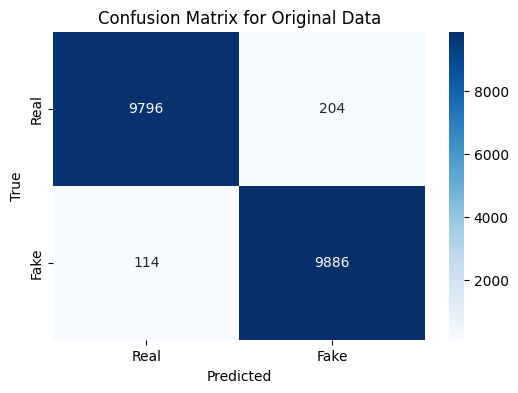

Flipped Data Accuracy: 0.5076


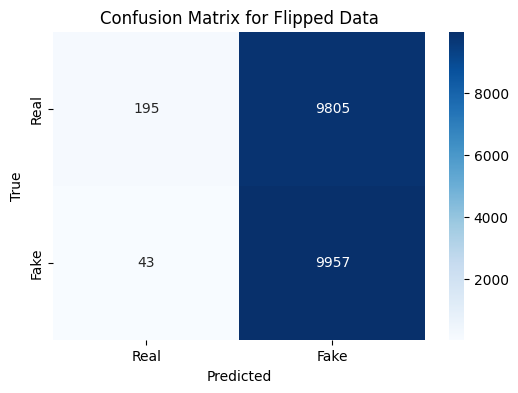

Brightness Data Accuracy: 0.50515


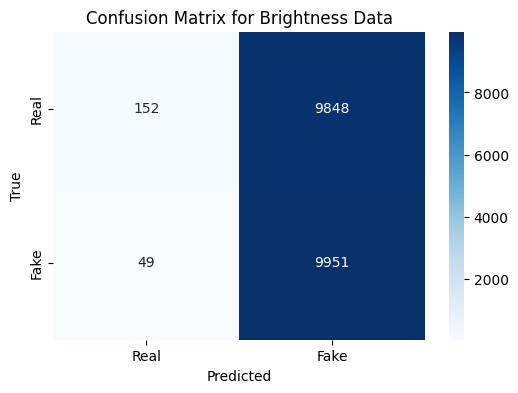

Rotation Data Accuracy: 0.5392


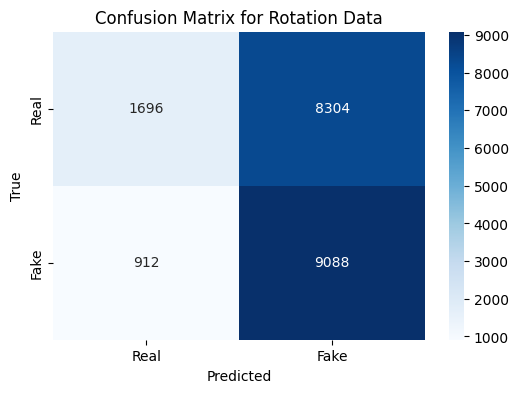

Blur Data Accuracy: 0.50245


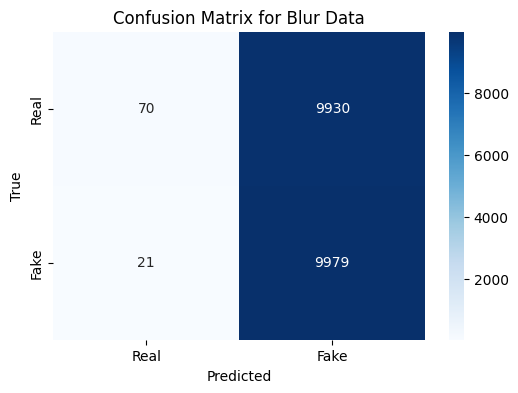

Grayscale Data Accuracy: 0.51105


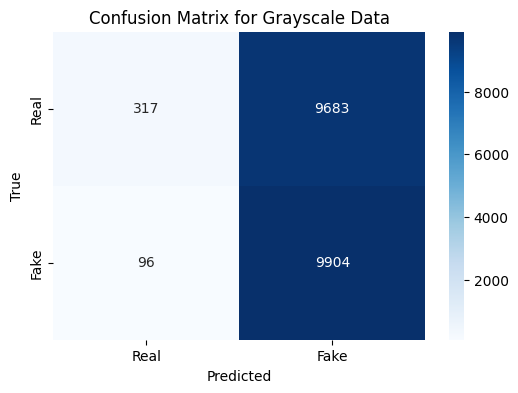

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter

# Helper function to compute confusion matrix and accuracy
def calculate_accuracy_and_confusion(predictions_real, predictions_fake):
    true_labels_real = [0] * len(predictions_real)  # 0 for REAL
    true_labels_fake = [1] * len(predictions_fake)  # 1 for FAKE
    
    # Combine real and fake predictions
    all_predictions = predictions_real + predictions_fake
    all_true_labels = true_labels_real + true_labels_fake
    
    # Confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions)
    
    # Accuracy
    accuracy = accuracy_score(all_true_labels, all_predictions)
    
    return accuracy, cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 1. Without Transformation (Original Data)
real_original = [0] * 9796 + [1] * 204  # 9796 real, 204 fake predictions for real images
fake_original = [1] * 9886 + [0] * 114  # 9886 fake, 114 real predictions for fake images

# Calculate accuracy and confusion matrix for original data
accuracy_original, cm_original = calculate_accuracy_and_confusion(real_original, fake_original)
print(f"Original Data Accuracy: {accuracy_original}")
plot_confusion_matrix(cm_original, "Confusion Matrix for Original Data")

# 2. After Transformations
# Flip transformation
real_flipped = [1] * 9805 + [0] * 195  # 9805 fake, 195 real predictions for real images after flip
fake_flipped = [1] * 9957 + [0] * 43  # 9957 fake, 43 real predictions for fake images after flip
accuracy_flipped, cm_flipped = calculate_accuracy_and_confusion(real_flipped, fake_flipped)
print(f"Flipped Data Accuracy: {accuracy_flipped}")
plot_confusion_matrix(cm_flipped, "Confusion Matrix for Flipped Data")

# Brightness transformation
real_brightness = [1] * 9848 + [0] * 152  # 9848 fake, 152 real predictions for real images after brightness
fake_brightness = [1] * 9951 + [0] * 49  # 9951 fake, 49 real predictions for fake images after brightness
accuracy_brightness, cm_brightness = calculate_accuracy_and_confusion(real_brightness, fake_brightness)
print(f"Brightness Data Accuracy: {accuracy_brightness}")
plot_confusion_matrix(cm_brightness, "Confusion Matrix for Brightness Data")

# Rotation transformation
real_rotation = [1] * 8304 + [0] * 1696  # 8304 fake, 1696 real predictions for real images after rotation
fake_rotation = [1] * 9088 + [0] * 912  # 9088 fake, 912 real predictions for fake images after rotation
accuracy_rotation, cm_rotation = calculate_accuracy_and_confusion(real_rotation, fake_rotation)
print(f"Rotation Data Accuracy: {accuracy_rotation}")
plot_confusion_matrix(cm_rotation, "Confusion Matrix for Rotation Data")

# Blur transformation
real_blur = [1] * 9930 + [0] * 70  # 9930 fake, 70 real predictions for real images after blur
fake_blur = [1] * 9979 + [0] * 21  # 9979 fake, 21 real predictions for fake images after blur
accuracy_blur, cm_blur = calculate_accuracy_and_confusion(real_blur, fake_blur)
print(f"Blur Data Accuracy: {accuracy_blur}")
plot_confusion_matrix(cm_blur, "Confusion Matrix for Blur Data")

# Grayscale transformation
real_grayscale = [1] * 9683 + [0] * 317  # 9683 fake, 317 real predictions for real images after grayscale
fake_grayscale = [1] * 9904 + [0] * 96  # 9904 fake, 96 real predictions for fake images after grayscale
accuracy_grayscale, cm_grayscale = calculate_accuracy_and_confusion(real_grayscale, fake_grayscale)
print(f"Grayscale Data Accuracy: {accuracy_grayscale}")
plot_confusion_matrix(cm_grayscale, "Confusion Matrix for Grayscale Data")


# **Summary of Findings:**

The analysis compares the performance of the model on **REAL** and **FAKE** images before and after applying various transformations (flipping, brightness adjustment, rotation, blur, and grayscale) and evaluates the results using **accuracy** and **confusion matrices**.

## **1. Original (No Transformation):**

- **Accuracy**: **98.41%**
- **REAL images**: 
  - The model correctly classified most **REAL** images:
 
- **FAKE images**:
  - It also successfully classified most **FAKE** images:
 
- The **confusion matrix** showed that the model was generally good at distinguishing between **REAL** and **FAKE** images in the original dataset.

## **2. After Applying Transformations:**

### **Flipping**:
- The model performed very well on **flipped** images for **FAKE** (9957 correctly classified)
- **But** for **REAL** (9805 incorrectly classified) images.

### **Brightness**:
- the **FAKE** images were classified more accuratly than without transformations, **but** slightly less performance than **flipped** images. 
- with **REAL** images still being misclassidied as **FAKE** .

### **Rotation**:
- **Rotation** seemed to slightly make the model classify **REAL** images more accuratly compared to other transformations but still the model is predicting majorty as **FAKE** ( 1696  correctly classified ).
- while the **FAKE** images were (9088 classified accuratly) this is the lowest value **FAKE** images have reaached.
-  this means that the model has a higher chance compared to other transformations to classify images as real if rotation was performed on them. 

### **Blur**:
- The **blur** transformation had maximal effect on the model  predicting images as **FAKE**.
- this means the model is more likely to predict images as **FAKE** if they were blurred.

### **Grayscale**:
- **Grayscale** transformation had a similar effect on images as the **brightness** transformation.

## **4. Conclusion:**

- The model’s ability to correctly classify **REAL** and **FAKE** images is significantly impacted by the transformations applied. While the original, untransformed dataset yielded excellent accuracy (**98.41%**) with most images being classified correctly, the performance began to degrade after applying various transformations.

### **Flipping**:
- This transformation had a minimal impact on **FAKE** image classification, but it caused a notable increase in misclassifications of **REAL** images. The model showed a tendency to classify **REAL** images as **FAKE** when flipped.

### **Brightness**:
- Adjustments in brightness led to improved classification of **FAKE** images, although still not as well as flipped images. **REAL** images, however, were still frequently misclassified as **FAKE**.

### **Rotation**:
- Rotation had a mixed effect. While it slightly improved the model's classification of **REAL** images compared to other transformations, the overall tendency remained to classify most images as **FAKE**.

### **Blur**:
- The **blur** transformation had the most significant negative effect, with the model increasingly classifying blurred images as **FAKE**, even when they were **REAL**. This suggests that the model struggles to differentiate between **REAL** and **FAKE** images when significant blurring is applied.

### **Grayscale**:
- Similar to brightness, converting images to **grayscale** caused the model to misclassify **REAL** images as **FAKE** more frequently, though the effect was less pronounced than with blurring.

### **Overall Impact**:
- Most transformations resulted in the model overclassifying images as **FAKE**, especially for **REAL** images, indicating that the transformations led to a shift in the feature space. This shift caused the model to struggle in distinguishing **REAL** images under transformed conditions, which highlights the importance of selecting appropriate transformations during model training and evaluation.

In conclusion, our research shows that image preprocessing steps significantly affect a model's ability to classify images accurately. Transformations such as flipping, brightness adjustment, rotation, blur, and grayscale altered key features, leading to increased misclassifications, particularly for REAL images. This suggests that certain preprocessing techniques can unintentionally shift the feature space, making classification more challenging. Our findings highlight the need for careful selection of preprocessing methods to enhance model robustness while preserving essential image characteristics. Future research should explore optimal transformation strategies to improve model performance across diverse real-world scenarios.

# phase 3

## second model

In [1]:
dataset_dir = "C:\\Users\\Noor\\Downloads\\DS_Project\\DS_Project" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir)

Loading dataset from: C:\Users\Noor\Downloads\DS_Project\DS_Project


## Phase 3: Load Image Dataset using TensorFlow

- This step uses `tf.keras.utils.image_dataset_from_directory` to load training and validation datasets directly from folders.
- The dataset is assumed to be organized into subdirectories (e.g., `train/FAKE`, `train/REAL`) which are automatically labeled.
- Image size is fixed at 32x32 to match model expectations.
- Class names are printed to verify correct label mapping and loading of images.
- Only 'FAKE' and 'REAL' classes are explicitly selected for validation.


In [2]:
# Import all of the data using dataset from directory
# If there isn't enough RAM available, consider using Tensorflow Datasets 

import tensorflow as tf

img_height = 32 # The dataset is all 32px but this is here just to make sure
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  class_names=['FAKE', 'REAL']  # Only these two classes will be used
)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = train_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


## Phase 3: Build and Compile the CNN Model

- This section defines a **hybrid model** combining:
  - Convolutional layers (CNN) for feature extraction.
  - Dense layers (ANN) for classification.
  
- The model is built using `tf.keras.Sequential()` and includes the following:
  1. `Rescaling`: Normalizes pixel values to [0, 1] range.
  2. `Conv2D` + `MaxPooling2D`: Extracts spatial features.
  3. `Flatten`: Converts 2D features to 1D.
  4. `Dense` layers: Fully connected layers for binary classification.
  
- The final dense layer uses a **sigmoid** activation for binary output (FAKE vs REAL).

- The model is compiled with:
  - **Adam** optimizer.
  - **BinaryCrossentropy** loss.
  - Metrics: Accuracy, Precision, and Recall for evaluation.

- `model.summary()` prints the architecture and number of trainable parameters.


In [3]:
# Building the CNN
layers = []
layers.append(tf.keras.layers.Rescaling(1./255)) # Normalise pixel values
layers.append(tf.keras.layers.Conv2D(32, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Flatten())

# Building the ANN
layers.append(tf.keras.layers.Dense(64, activation='relu'))
layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create and compile the model from layers
model = tf.keras.Sequential(layers)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Build the model so we can see a summary
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,825 (1.76 MB)

 Trainable params: 461,825 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

<sub>This model uses CNN layers for feature extraction and dense layers for binary classification. The summary above confirms the model's structure and trainable parameters.</sub>



In [6]:
pip install tensorflow==2.13


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.13 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.13

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Environment Information

- This cell prints the current TensorFlow version and checks how many GPUs are available.
- Useful for confirming if the code is running with GPU support or only on CPU.


In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.19.0
Num GPUs Available: 0


## Model Training

- Starts training the compiled CNN model using the training dataset (`train_ds`) and validates using `val_ds`.
- Runs for 5 epochs with `verbose=1` to show progress per epoch.
- Stores the training history (loss, accuracy, etc.) in a variable for future analysis.


In [9]:
# Finally, train the model

print("Starting training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  verbose=1
)
print("Training finished.")

Starting training...
Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8155 - loss: 0.3974 - precision: 0.8024 - recall: 0.8283 - val_accuracy: 0.8845 - val_loss: 0.2734 - val_precision: 0.8450 - val_recall: 0.9419
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8979 - loss: 0.2518 - precision: 0.8869 - recall: 0.9104 - val_accuracy: 0.9036 - val_loss: 0.2469 - val_precision: 0.9360 - val_recall: 0.8666
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9170 - loss: 0.2084 - precision: 0.9108 - recall: 0.9230 - val_accuracy: 0.9212 - val_loss: 0.2006 - val_precision: 0.9257 - val_recall: 0.9158
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9293 - loss: 0.1793 - precision: 0.9251 - recall: 0.9330 - val_accuracy: 0.9229 - val_loss: 0.1969 - val_precision: 0.9299 - val_recall: 0.9148
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9379 - loss: 0.1572 - precision: 0.9339 - recall: 0.9414 - val_

<sub>The model trained for 5 epochs and showed progressive improvement in accuracy and reduction in loss, indicating good learning behavior.</sub>


In [11]:
# Save the model in the new format
model.save('my_model.keras')


## Phase 3: Model Evaluation on Test Data

- This section loads the saved model and evaluates its performance on the test dataset.
- Test images are loaded using `image_dataset_from_directory`, matching the training format.
- For each image in the test set:
  - The model predicts probabilities which are converted to class labels using a threshold of 0.5.
  - Labels are mapped to binary: `FAKE` = 0 and `REAL` = 1.

- The performance is then measured using:
  - **Accuracy**: Overall correctness of predictions.
  - **Precision**: Correct positive predictions out of all predicted positives.
  - **Recall**: Correct positive predictions out of all actual positives.
  - **F1 Score**: Harmonic mean of precision and recall.


In [18]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the trained model
model = tf.keras.models.load_model('my_model.h5')  # Or 'my_model.keras' if using the newer format

# Set the image size according to your model's input size
img_height = 32
img_width = 32

# Load the test data
dataset_dir = 'C:\\Users\\Noor\\Downloads\\DS_Project\\DS_Project'
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32,
    labels='inferred',
    class_names=['FAKE', 'REAL']  # Only these two classes will be used
)

# Initialize lists to store the true labels and predictions
true_labels = []
predicted_labels = []

# Iterate over the test dataset
for images, labels in test_ds:
    # Make predictions
    predictions = model.predict(images)
    
    # Convert predictions from probabilities to class labels (threshold at 0.5)
    predicted_class_names = ['REAL' if p > 0.5 else 'FAKE' for p in predictions]
    
    # Convert the true labels to 'FAKE' = 0 and 'REAL' = 1
    true_labels.extend(labels.numpy())  # true labels from the dataset
    predicted_labels.extend([0 if label == 'FAKE' else 1 for label in predicted_class_names])

# Calculate performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the metrics as percentages
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")



Found 20000 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━

## Model 2 summery 

In this part of the project, we developed and evaluated a binary image classification model (Model 2) designed to distinguish between 'FAKE' and 'REAL' images.

The process began with loading and preprocessing the dataset using `image_dataset_from_directory`. Images were resized to 32x32 pixels for efficiency and to maintain consistency with the model’s input expectations.

The model was built using the Keras Sequential API. It consisted of rescaling, convolutional, and max pooling layers to extract relevant features, followed by dense layers for classification. A sigmoid activation function was used in the final layer to produce binary predictions.

The model was compiled with the Adam optimizer and trained for 5 epochs. Evaluation was done using accuracy, precision, recall, and F1-score. Predictions were converted from probabilities to class labels using a 0.5 threshold and mapped to binary values for proper metric computation.

A small challenge was encountered in mapping predicted probabilities to class labels, which was addressed through manual conversion. Overall, Model 2 achieved high performance across all metrics, showing reliable generalization and effective handling of the classification task.


## third model

## Model 3: Dataset Preparation and Constants

- In this model, images are loaded manually using `glob` and Keras utilities (`load_img`, `img_to_array`).
- The image size is increased to **128x128** to preserve more spatial features and improve learning capacity.
- The dataset is divided manually into training and validation sets using file paths.
- This setup allows for more flexible preprocessing and custom handling of images.


In [45]:
import numpy as np
import glob
import os
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

# Defining Constants
image_size = (128, 128)
folder_train = 'C:\\Users\\Noor\\Downloads\\DS_Project\\DS_Project\\train'
folder_test = 'C:\\Users\\Noor\\Downloads\\DS_Project\\DS_Project\\test'
batch_size = 32
epochs = 10

# Initialize lists to store data
X_train = []
Y_train = []
X_val = []
Y_val = []

## Manual Image Loading and Labeling

- A custom `prepare_image()` function handles loading, resizing, and normalizing images from disk.
- Images are organized in subfolders labeled `FAKE` and `REAL`, and loaded manually using glob patterns.
- Labels are assigned explicitly: `0` for FAKE and `1` for REAL.
- This approach provides flexibility in handling different folder structures and allows full control over preprocessing steps.


In [46]:
# Function to prepare image
def prepare_image(image_path):
    image = load_img(image_path, target_size=image_size)
    image = img_to_array(image) / 255.0  # Normalize image
    return image

# Load training data from the train folder (FAKE and REAL)
train_fake_paths = glob.glob(os.path.join(folder_train, 'FAKE', '*.jpg'))
train_real_paths = glob.glob(os.path.join(folder_train, 'REAL', '*.jpg'))

for path in train_fake_paths:
    X_train.append(prepare_image(path))
    Y_train.append(0)  # FAKE images are labeled as 0
for path in train_real_paths:
    X_train.append(prepare_image(path))
    Y_train.append(1)  # REAL images are labeled as 1

# Load validation data from the test folder (FAKE and REAL)
test_fake_paths = glob.glob(os.path.join(folder_test, 'FAKE', '*.jpg'))
test_real_paths = glob.glob(os.path.join(folder_test, 'REAL', '*.jpg'))

for path in test_fake_paths:
    X_val.append(prepare_image(path))
    Y_val.append(0)  # FAKE images are labeled as 0
for path in test_real_paths:
    X_val.append(prepare_image(path))
    Y_val.append(1)  # REAL images are labeled as 1


<sub>The images were successfully loaded and labeled manually using glob patterns and custom preprocessing. This approach ensures full transparency and control over dataset construction.</sub>


## Data Conversion and Preparation

- Image and label lists are converted to NumPy arrays to ensure compatibility with Keras models.
- The training data is shuffled using a fixed random state for reproducibility.
- Labels are converted to one-hot encoded vectors to match the expected input format for categorical classification.
- The number of training and validation samples is printed to verify that the data has been loaded correctly.


In [47]:

# Convert lists to numpy arrays and shuffle the training data
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

# Shuffle the training data
X_train, Y_train = shuffle(X_train, Y_train, random_state=5)

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, 2)
Y_val = to_categorical(Y_val, 2)

# Verify the data
print(f'Number of training samples: {len(X_train)}')
print(f'Number of validation samples: {len(X_val)}')


Number of training samples: 100000
Number of validation samples: 20000


<sub>Data was successfully converted and prepared for training. One-hot encoding and shuffling ensure the model receives correctly formatted and well-distributed input.</sub>


## Model Definition and Training

- A Sequential model is constructed with two convolutional layers, followed by max pooling and dropout for regularization.
- The output is flattened and passed through a fully connected layer and another dropout layer before the final softmax output layer.
- The model uses the Adam optimizer and is compiled with binary crossentropy loss and accuracy as the metric.
- Early stopping is implemented to monitor validation loss and stop training if performance stops improving.
- Training is conducted on the prepared dataset, and the model is saved afterward for reuse.


In [48]:
# Model definition 
def define_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=(128, 128, 3)))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=lr, decay=lr/epochs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = define_model()

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val), callbacks=[early_stopping])

# Save the model
model.save('model_casia_AI_image_predictor_cnn.h5')


c:\Users\Noor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Noor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 980s 313ms/step - accuracy: 0.8010 - loss: 0.4230 - val_accuracy: 0.8943 - val_loss: 0.2625
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 828s 265ms/step - accuracy: 0.8958 - loss: 0.2585 - val_accuracy: 0.9075 - val_loss: 0.2283
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 813s 260ms/step - accuracy: 0.9142 - loss: 0.2142 - val_accuracy: 0.9197 - val_loss: 0.1989
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 806s 258ms/step - accuracy: 0.9286 - loss: 0.1835 - val_accuracy: 0.9247 - val_loss: 0.1890
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 805s 258ms/step - accuracy: 0.9360 - loss: 0.1617 - val_accuracy: 0.9277 - val_loss: 0.1804
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 805s 258ms/step - accuracy: 0.9441 - loss: 0.1459 - val_accuracy: 0.9352 - val_loss: 0.1681
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 809s 259ms/step - accuracy: 0.9507 - loss: 0.1313 - val_accuracy: 0.9292 - val_loss: 0.1885
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 809s 259ms/step - ac

<sub>Training completed in 8 epochs with early stopping applied. Validation accuracy steadily improved and reached 93.52%, indicating strong model performance and minimal overfitting.</sub>


## Model Evaluation and Visualization

- The trained model is used to predict labels for the validation set.
- Evaluation metrics such as training/validation loss and accuracy are printed to assess model performance.
- A normalized confusion matrix is plotted to visualize how well the model distinguishes between the two classes.
- Line plots are generated to show the evolution of loss and accuracy during training.


625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step
Training Loss: 0.1193
Validation Loss: 0.1715
Training Accuracy: 95.47%
Validation Accuracy: 93.52%


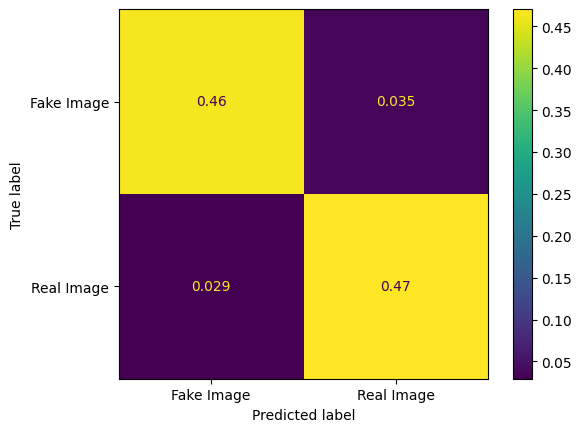

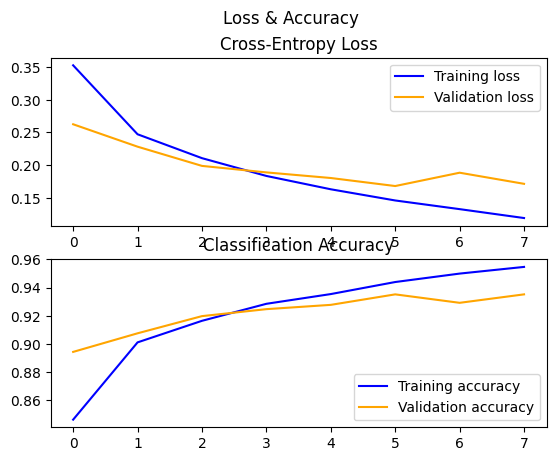

In [50]:
# Evaluate the model and get predictions
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

# Output evaluation metrics as percentages
print(f'Training Loss: {hist.history["loss"][-1]:.4f}')
print(f'Validation Loss: {hist.history["val_loss"][-1]:.4f}')
print(f'Training Accuracy: {hist.history["accuracy"][-1] * 100:.2f}%')
print(f'Validation Accuracy: {hist.history["val_accuracy"][-1] * 100:.2f}%')

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_true, Y_pred_classes, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fake Image', 'Real Image'])
cmd.plot()

# Summarizing diagnostics function for loss and accuracy plots
def summarize_diagnostics(history):
    fig, ax = plt.subplots(2)
    fig.suptitle("Loss & Accuracy")
    ax[0].set_title('Cross-Entropy Loss')
    ax[0].plot(history.history['loss'], color='blue', label='Training loss')
    ax[0].plot(history.history['val_loss'], color='orange', label='Validation loss')
    ax[0].legend(loc='best')
    
    ax[1].set_title('Classification Accuracy')
    ax[1].plot(history.history['accuracy'], color='blue', label='Training accuracy')
    ax[1].plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')
    ax[1].legend(loc='best')

summarize_diagnostics(hist)


<sub>The model shows strong accuracy and low loss on both training and validation sets. Confusion matrix and diagnostic plots confirm that the model performs consistently and handles both classes effectively.</sub>


## Model 3 summery

In this stage, we designed and evaluated a deep convolutional neural network aimed at classifying images as either 'FAKE' or 'REAL'. 

Unlike previous models, data was manually loaded using custom image preprocessing and glob-based file collection. Images were resized to 128x128 pixels to retain more visual features. Labels were manually assigned (0 for FAKE, 1 for REAL), and one-hot encoding was applied for compatibility with softmax output.

The model architecture included two convolutional layers with `ReLU` activation, max pooling, dropout regularization, and two dense layers, with `softmax` used for classification. The Adam optimizer was selected, and binary crossentropy was used as the loss function.

Training was performed using early stopping based on validation loss, which helped avoid overfitting. The model achieved a final training accuracy of **95.47%** and a validation accuracy of **93.52%**, with corresponding low loss values. Visualizations confirmed stable and consistent learning throughout the epochs.

The confusion matrix showed balanced predictions between the two classes, and the loss/accuracy plots confirmed that the model generalized well to unseen data.

Overall, this model delivered high performance and demonstrated effective learning and class separation with no signs of overfitting.


## Final Model Comparison Summary

In this project, three models were developed to classify images as either "FAKE" or "REAL".  
Model 1 served as a baseline, while Models 2 and 3 were custom-built and trained to provide more control and evaluation depth.

**Model 1 – Baseline (Pre-trained ViT)**  
- Utilized a pre-trained Vision Transformer (ViT) model from HuggingFace with no additional training.
- Achieved high prediction accuracy of **98%** on individual test samples.
- However, it lacked detailed performance metrics such as loss, precision, recall, F1-score, and confusion matrix.
- No training curves or diagnostic tools were available, making performance analysis limited.
- Suitable for quick testing and prototyping, but not ideal for full evaluation or model tuning.

**Model 2 – Custom CNN**  
- Built and trained from scratch using a compact CNN + ANN architecture on 32x32 images.
- Reached a validation accuracy of **92.69%**, along with balanced metrics across precision, recall, and F1-score.
- Provided full transparency during training and evaluation, enabling meaningful performance analysis.
- Lightweight and efficient, ideal for resource-limited scenarios.

**Model 3 – Deeper CNN with Dropout**  
- An enhanced architecture using 128x128 images, dropout layers for regularization, and additional convolutional layers.
- Achieved a validation accuracy of **93.52%** and training accuracy of **95.47%**.
- Delivered the best generalization performance, confirmed through confusion matrix, learning curves, and stable training behavior.

### Conclusion:
- **Highest raw accuracy:** Model 1 (98%), but lacks deeper insights and evaluation tools.
- **Best overall evaluation and control:** Model 3, with comprehensive training and strong, stable performance.
- **Best lightweight solution:** Model 2, offering strong results with minimal complexity.
- While Model 1 serves as a strong baseline, Models 2 and 3 provide richer, measurable, and tunable performance suitable for research and development.
